In [253]:
# Import necessary libraries for the project

# Data manipulation and analysis
import pandas as pd

# For working with JSON data
import json

# For interacting with the operating system
import os

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Numerical operations
import numpy as np
from scipy import stats

# Working with dates and times
import datetime as dt
from datetime import timedelta

# Saving and loading Python objects
import joblib

# Preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier,LinearRegression,Lasso
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

# Adjusting plot dimensions
from pylab import rcParams

# Machine learning using TensorFlow
import tensorflow as tf

# Creating word clouds
from wordcloud import WordCloud

# Ignoring warnings
import warnings
warnings.simplefilter('ignore')

# Setting Seaborn theme for data visualization
sns.set_theme(style="dark")

# Additional libraries
from xgboost import XGBRegressor
# Now you can start using these libraries for your project tasks.

import plotly.express as px

**Step-1 Import the required Libraries/Dataset**


In [124]:
# Read the CSV file into a DataFrame
Weather_Hist = pd.read_csv('/kaggle/input/weather-history/Weather_History.csv')

**Step-2 Checking the Dataset Details**

In [125]:
##----Column Headings with Data Types----------------##
Weather_Hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [88]:
# Display the DataFrame
Weather_Hist.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [89]:
##Generate Statistics of this dataste

Weather_Hist.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [90]:
#Printing the shape of dataset
print("Number of Columns in the Weather History Data frame:", Weather_Hist.shape[1])
print("Number of records in the Weather History data frame:", Weather_Hist.shape[0])

Number of Columns in the Weather History Data frame: 12
Number of records in the Weather History data frame: 96453


**Data Quality and Cleansing**

Lets do the  preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques to fix all these issues.

In [91]:
print ("Unique values are:\n",Weather_Hist.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


**Identifying and Dropping Duplicates**


In [126]:
# Check for duplicate data

duplicates = Weather_Hist[Weather_Hist.duplicated()]

# Print the number of duplicate rows, if any
num_duplicates = len(duplicates)
if num_duplicates > 0:
    print("\n")
    print(f"{num_duplicates} duplicate rows found in Weathe History Dataset.")
    print("\n")
    print(duplicates)
else:
    print("No duplicate rows found in WeatherHistory.")



24 duplicate rows found in Weathe History Dataset.


                      Formatted Date        Summary Precip Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  

In [127]:
# Removing duplicated values
Weather_Hist.drop_duplicates(inplace=True)
# Again checking for duplicated values
print("Duplicated Values: ", Weather_Hist.duplicated().sum())

Duplicated Values:  0


In [94]:
#Printing the shape of dataset after deleting Duplicates
print("Number of Columns in the Weather History Data frame:", Weather_Hist.shape[1])
print("Number of records in the Weather History data frame:", Weather_Hist.shape[0])

Number of Columns in the Weather History Data frame: 12
Number of records in the Weather History data frame: 96429


In [128]:
# Checking missing values

# Check for null values in the DataFrame
null_values = Weather_Hist.isnull().sum()

# Print the count of null values in each column
print('Checking the NULL Values in  WeatherHistory Dataset..\n')

# Check if there are any null values
if null_values.sum() == 0:
    print(f'\n There are no null values in the given dataset.')
else:
    columns_with_null_values = null_values[null_values > 0].index.tolist()
    # Loop over the columns with null values and print the count of null values for each column
    for column in columns_with_null_values:
        count = null_values[column]
        print(f"Column '{column}' has {count} null values.")

Checking the NULL Values in  WeatherHistory Dataset..

Column 'Precip Type' has 517 null values.


In [136]:
# Handling missing values
Weather_Hist['Precip Type'].value_counts()


rain    85717
snow    10712
Name: Precip Type, dtype: int64

In [130]:
# Handling missing values - check value
Weather_Hist['Precip Type'].values

array(['rain', 'rain', 'rain', ..., 'rain', 'rain', 'rain'], dtype=object)

As  we can see that 517 missing values are present and we should not delete it. Because removing 517 random formatted date which can have large negative impact on our analysis.
Hence, we can see here that majority of Precip Type is rain so that we can replace missing values with rain

In [137]:
# replace the missing values of Precip Type variable with rain value
Weather_Hist['Precip Type'].fillna("rain", inplace=True)

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96429, dtype: object

In [138]:
# Re-check Handling Missing Values
missing_values = Weather_Hist.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


**Lets Check Categorical & Numeric Variables / Features**


In [139]:
# Different types of columns
numeric_columns = Weather_Hist.select_dtypes(include='number')
categorical_columns = Weather_Hist.select_dtypes(include=['object'])
print("Numerical Columns: ", numeric_columns)
print()
print("Categorical Columns: ", categorical_columns)
print()


Numerical Columns:         Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       

In [140]:
numeric_columns.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [141]:
categorical_columns.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

Lets Handle Categorical Features - Using Encoding Techniques

In [142]:
# Let's have a look at how many lable's each variable/column have
for col in categorical_columns.columns:
    print(col,": ",len(Weather_Hist[col].unique())," lables")

Formatted Date :  96429  lables
Summary :  27  lables
Precip Type :  2  lables
Daily Summary :  214  lables


In [143]:
# Precip Type - only 2 lables are present for this feature
Weather_Hist['Precip Type'].value_counts()

rain    85717
snow    10712
Name: Precip Type, dtype: int64

In [144]:
Weather_Hist.tail()

Formatted Date        Summary Precip Type  \
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96448                      31          16.1000           0   
96449                      20          15.5526           0   
96450                      30          16.1000           0   
96451                      20          16.1000           0   
96452                      39          15.5204           0   

       Pressure (millibars)                           Daily Summary  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.

**Lets Visualize the data with some graphs to get better understanding of the data**

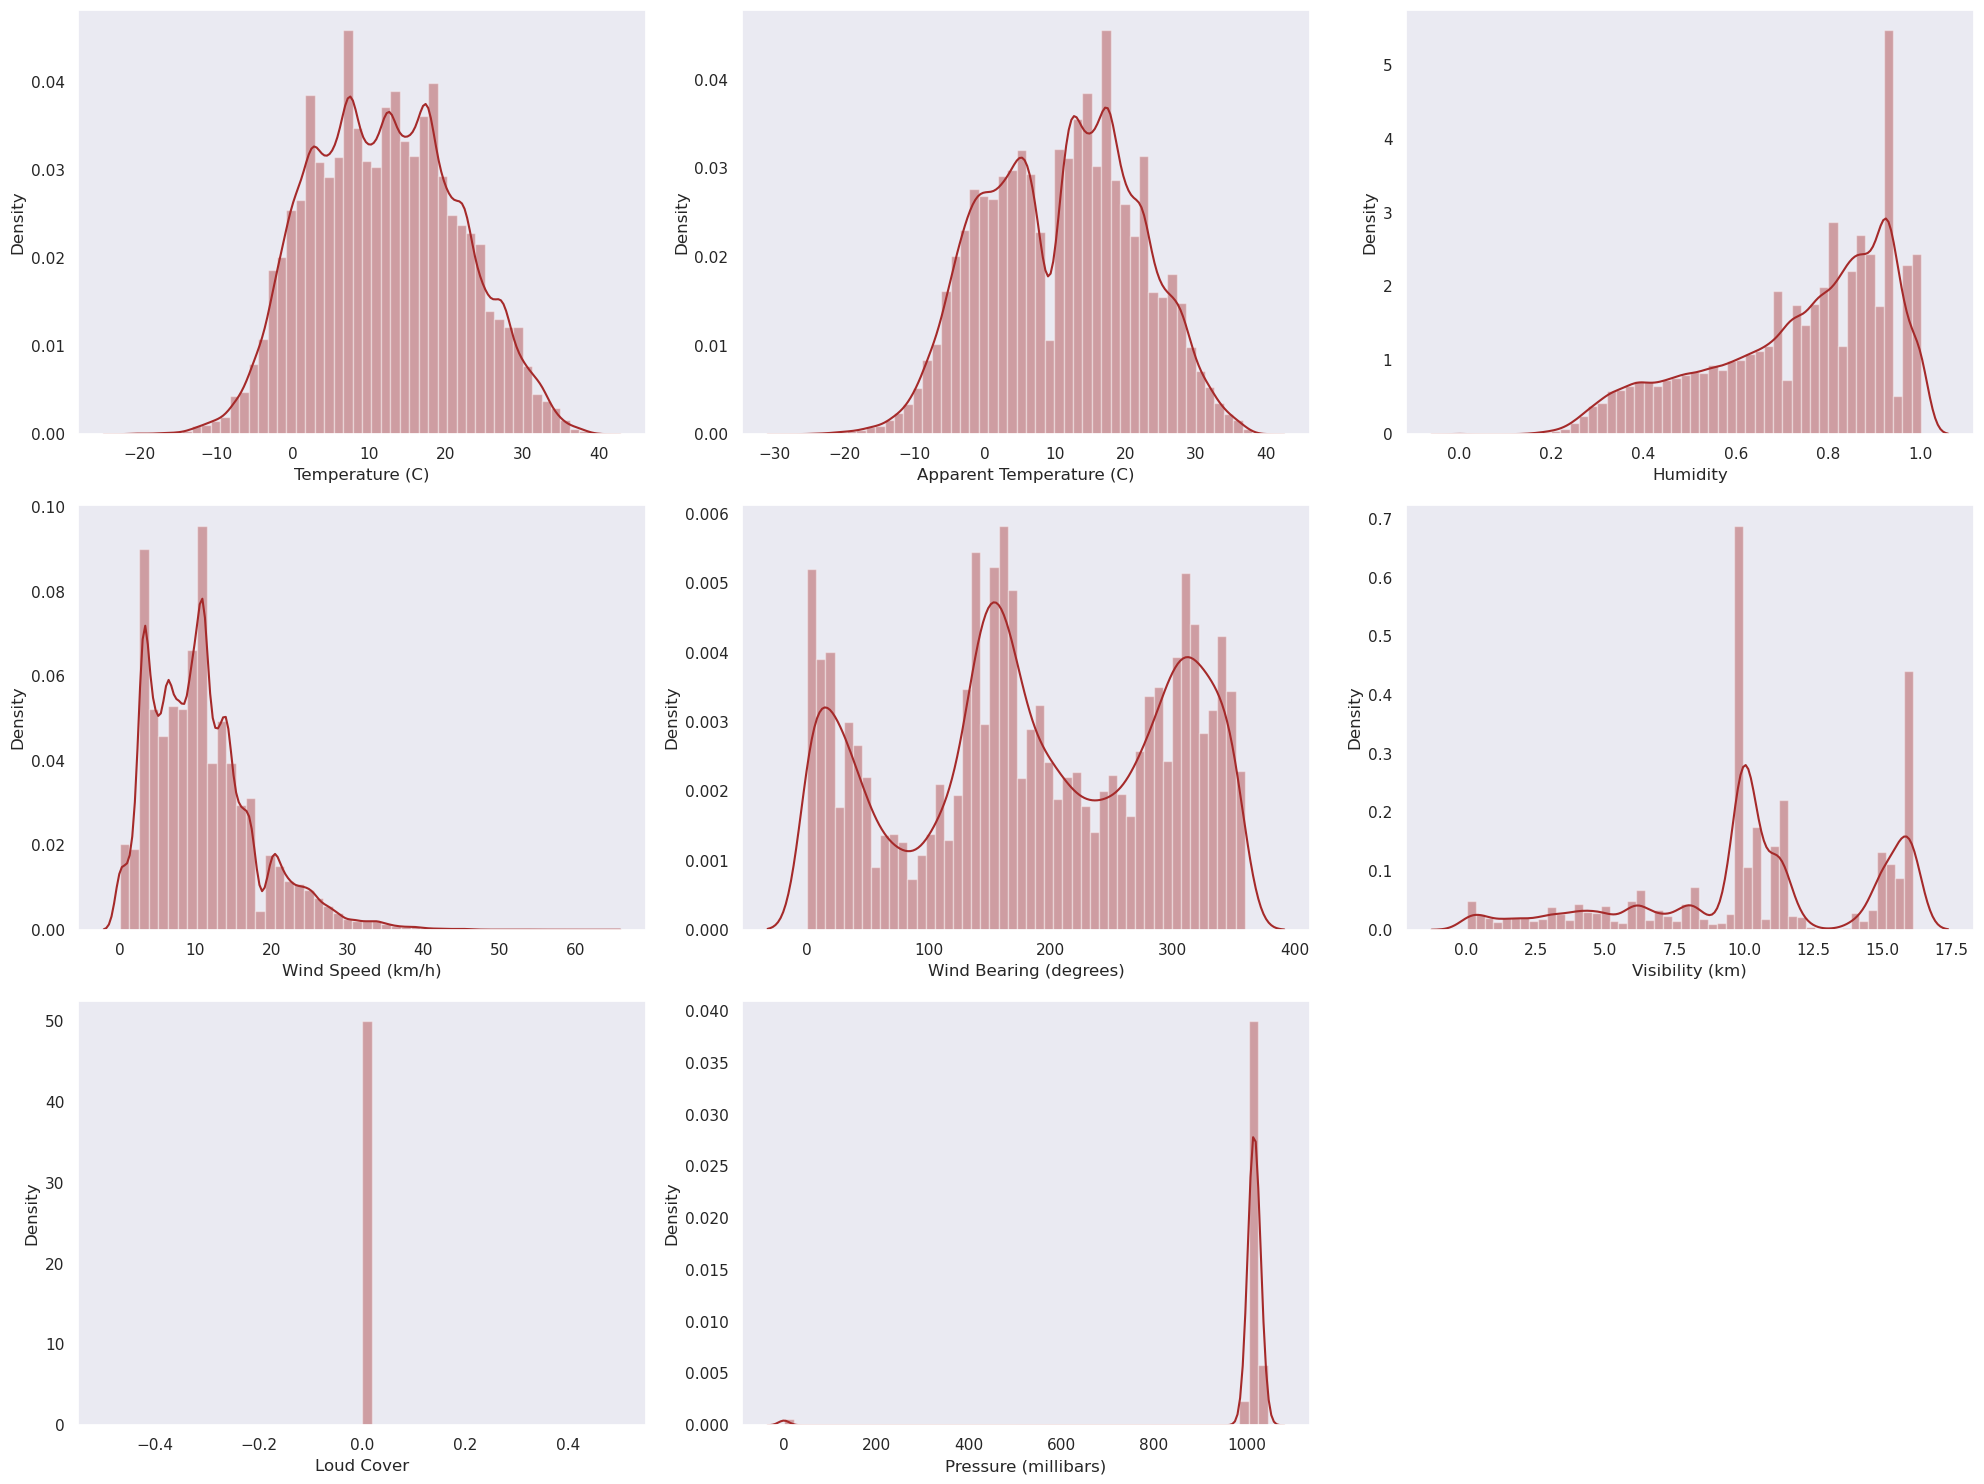

In [113]:
# Normal Distribution of Data points related to numerical features
plt.figure(figsize=(20, 15))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.distplot(Weather_Hist[numeric_columns.columns[i-1]], color='Brown')
    plt.tight_layout()

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

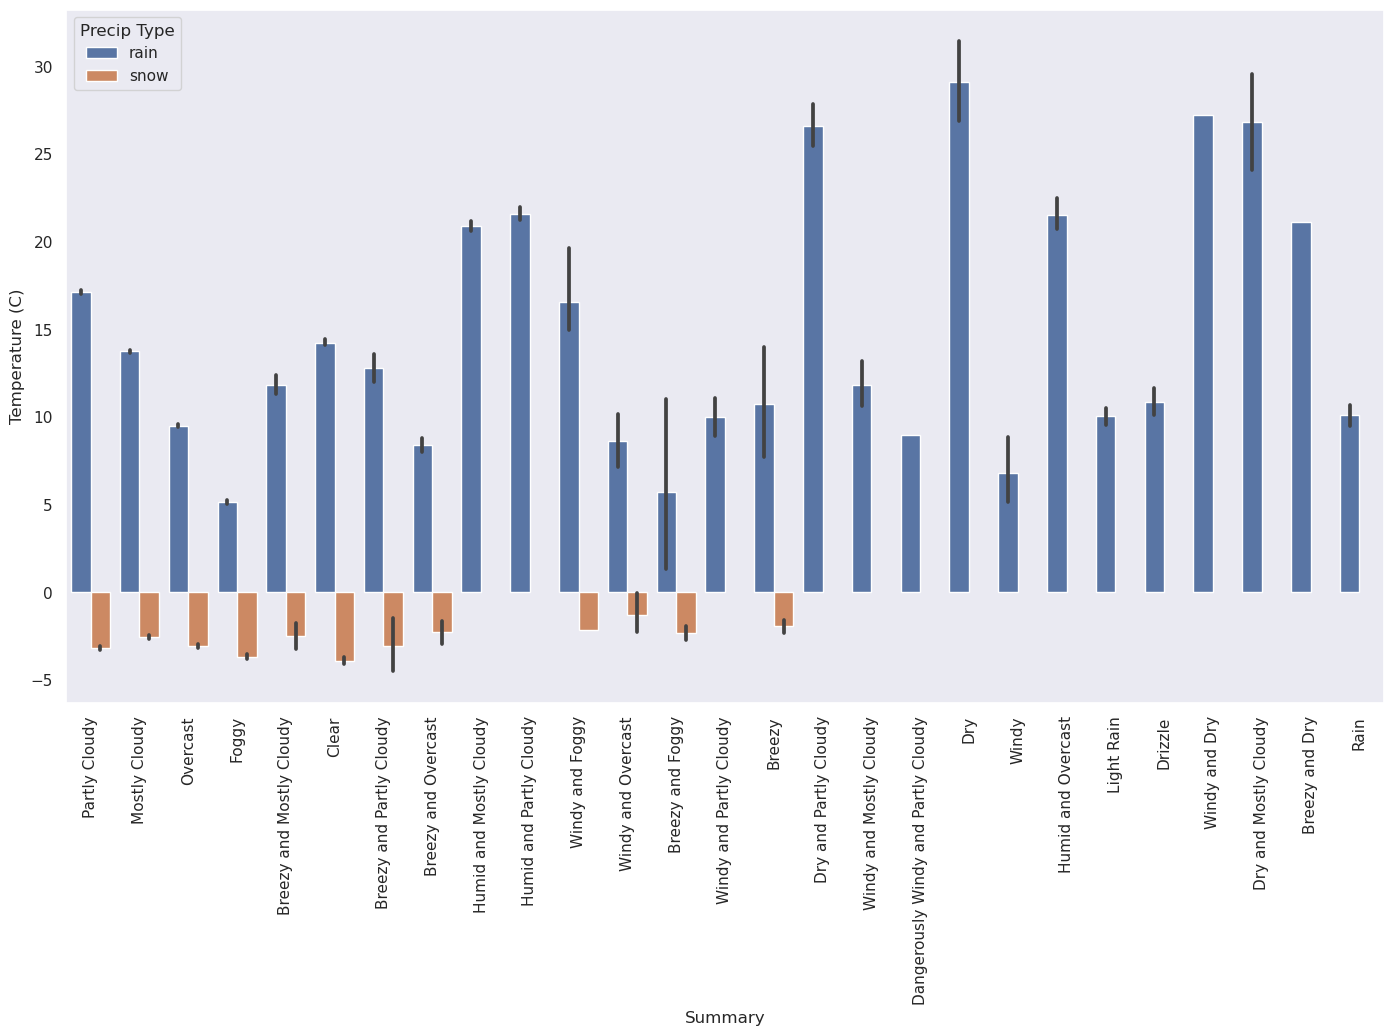

In [30]:
# Create a new figure for the bar plot with a specified size (17 units wide and 9 units tall)
plt.figure(figsize=(17, 9))

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Create a bar plot using seaborn's barplot function
# The data for the plot is taken from the WeatherHistory DataFrame.
# The x-axis represents the "Summary" column, the y-axis represents the "Temperature (C)" column,
# and the "Precip Type" column is used to distinguish bars by hue.
sns.barplot(data=Weather_Hist, x="Summary", y="Temperature (C)", hue="Precip Type")

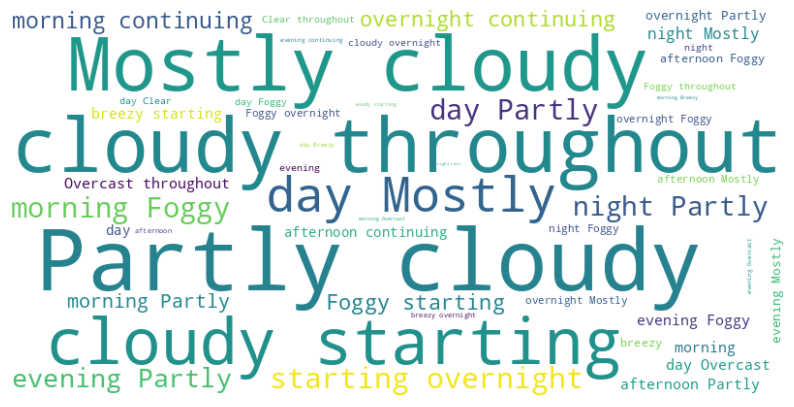

In [31]:
# Creating Word Cloud for daily summary
text = ' '.join(Weather_Hist['Daily Summary'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

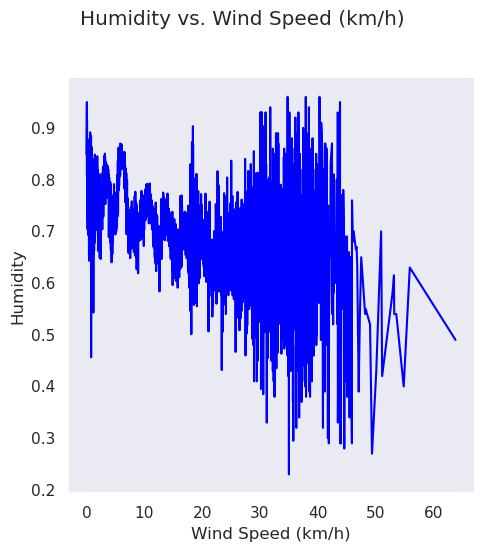

In [32]:
plt.figure(figsize=(12,8))
g = sns.relplot(x='Wind Speed (km/h)',y='Humidity', data=Weather_Hist, kind="line", color="blue", ci=None)
g.fig.suptitle("Humidity vs. Wind Speed (km/h)",y=1.1)
plt.show()

**Insights: According to Scientific Research, The Higher wind speed causes minimum evaporation of water, and low humidity, or vice versa. We can see the trend being proven in this plot above**

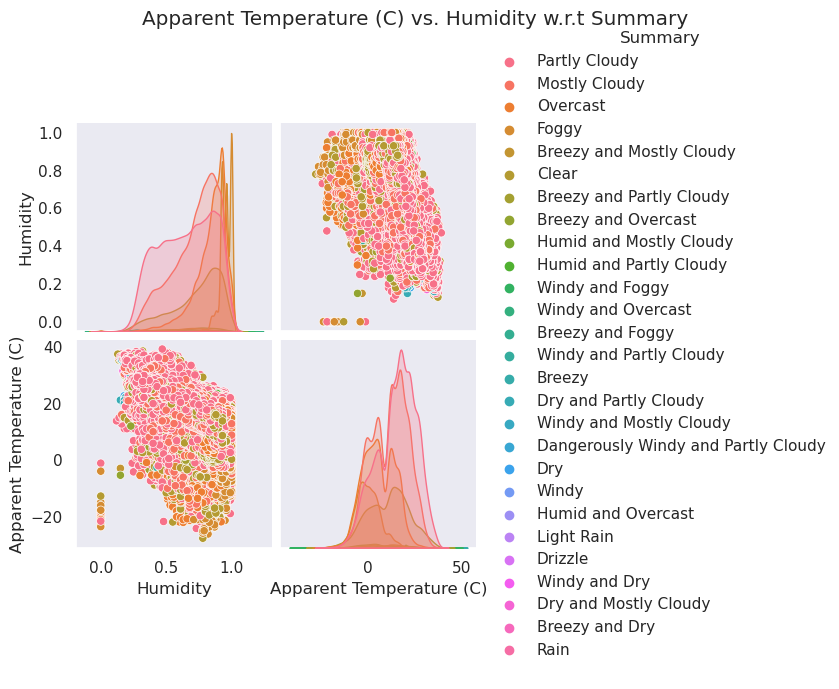

In [33]:
g = sns.pairplot(Weather_Hist, vars=['Humidity', 'Apparent Temperature (C)'], hue='Summary')
g.fig.suptitle("Apparent Temperature (C) vs. Humidity w.r.t Summary",y=1.2)
plt.show()

Text(0.5, 1.0, 'Analysis of Weather Conditions with Temperature(C)')

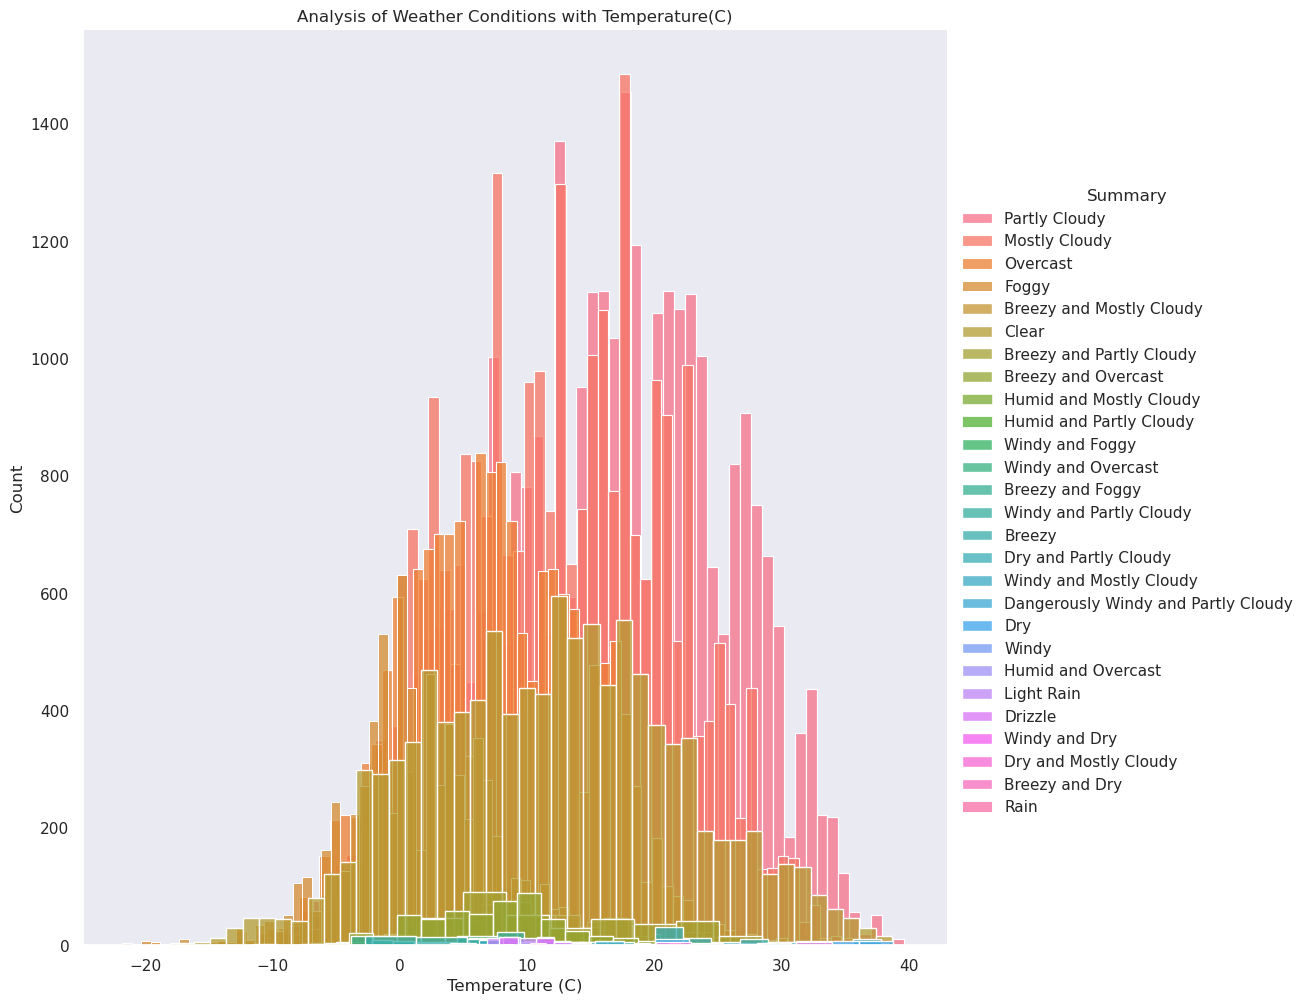

In [34]:
# Analysis of Weather Conditions with Temperature(C)
sns.FacetGrid(Weather_Hist, hue="Summary", height=10).map(sns.histplot, "Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Temperature(C)")

<Axes: xlabel='Summary', ylabel='Pressure (millibars)'>

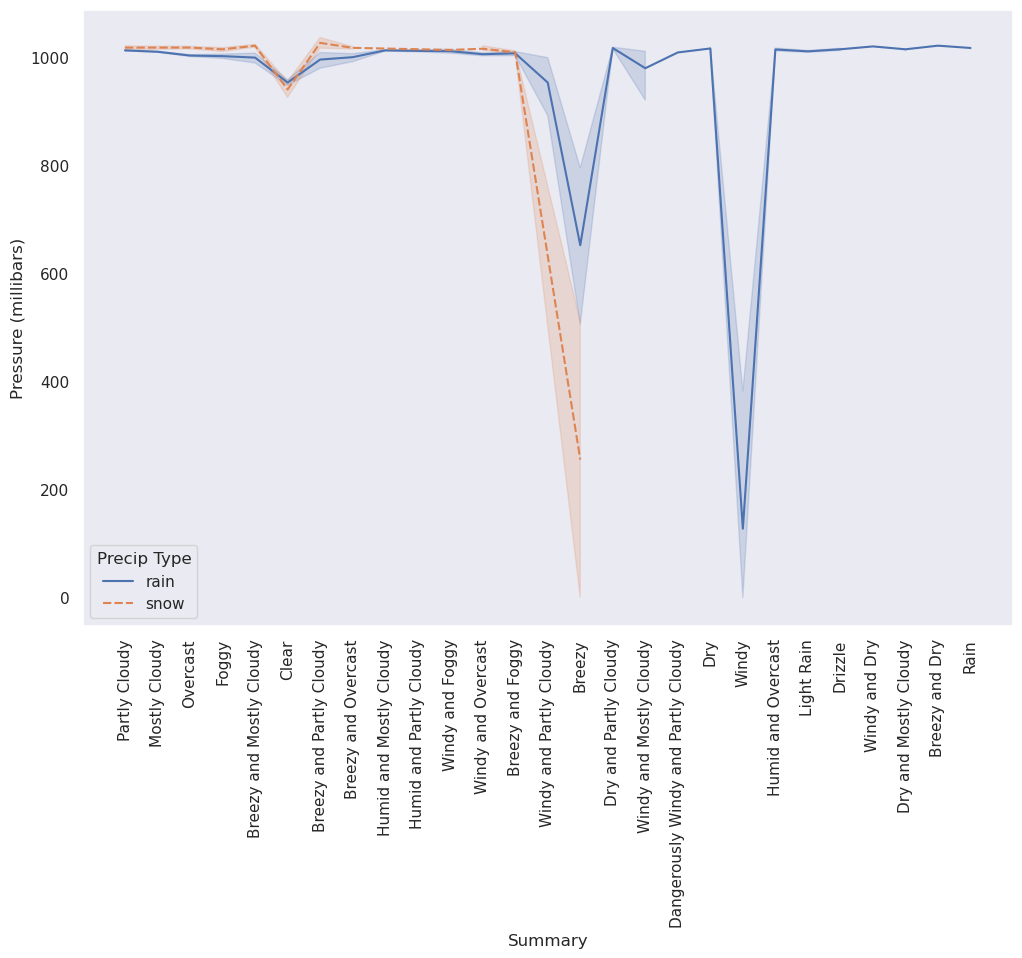

In [35]:
# Create a new figure for the line plot with a specified size (7 units wide and 5 units tall)
plt.figure(figsize=(12, 8))

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Create a line plot using seaborn's lineplot function
# The data for the plot is taken from the Weather_History DataFrame.
# The x-axis represents the "Summary" column, the y-axis represents the "Pressure (millibars)" column,
# the "Precip Type" column is used to distinguish lines by hue,
# and the "Precip Type" column is also used to distinguish lines by style.
sns.lineplot(data=Weather_Hist, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

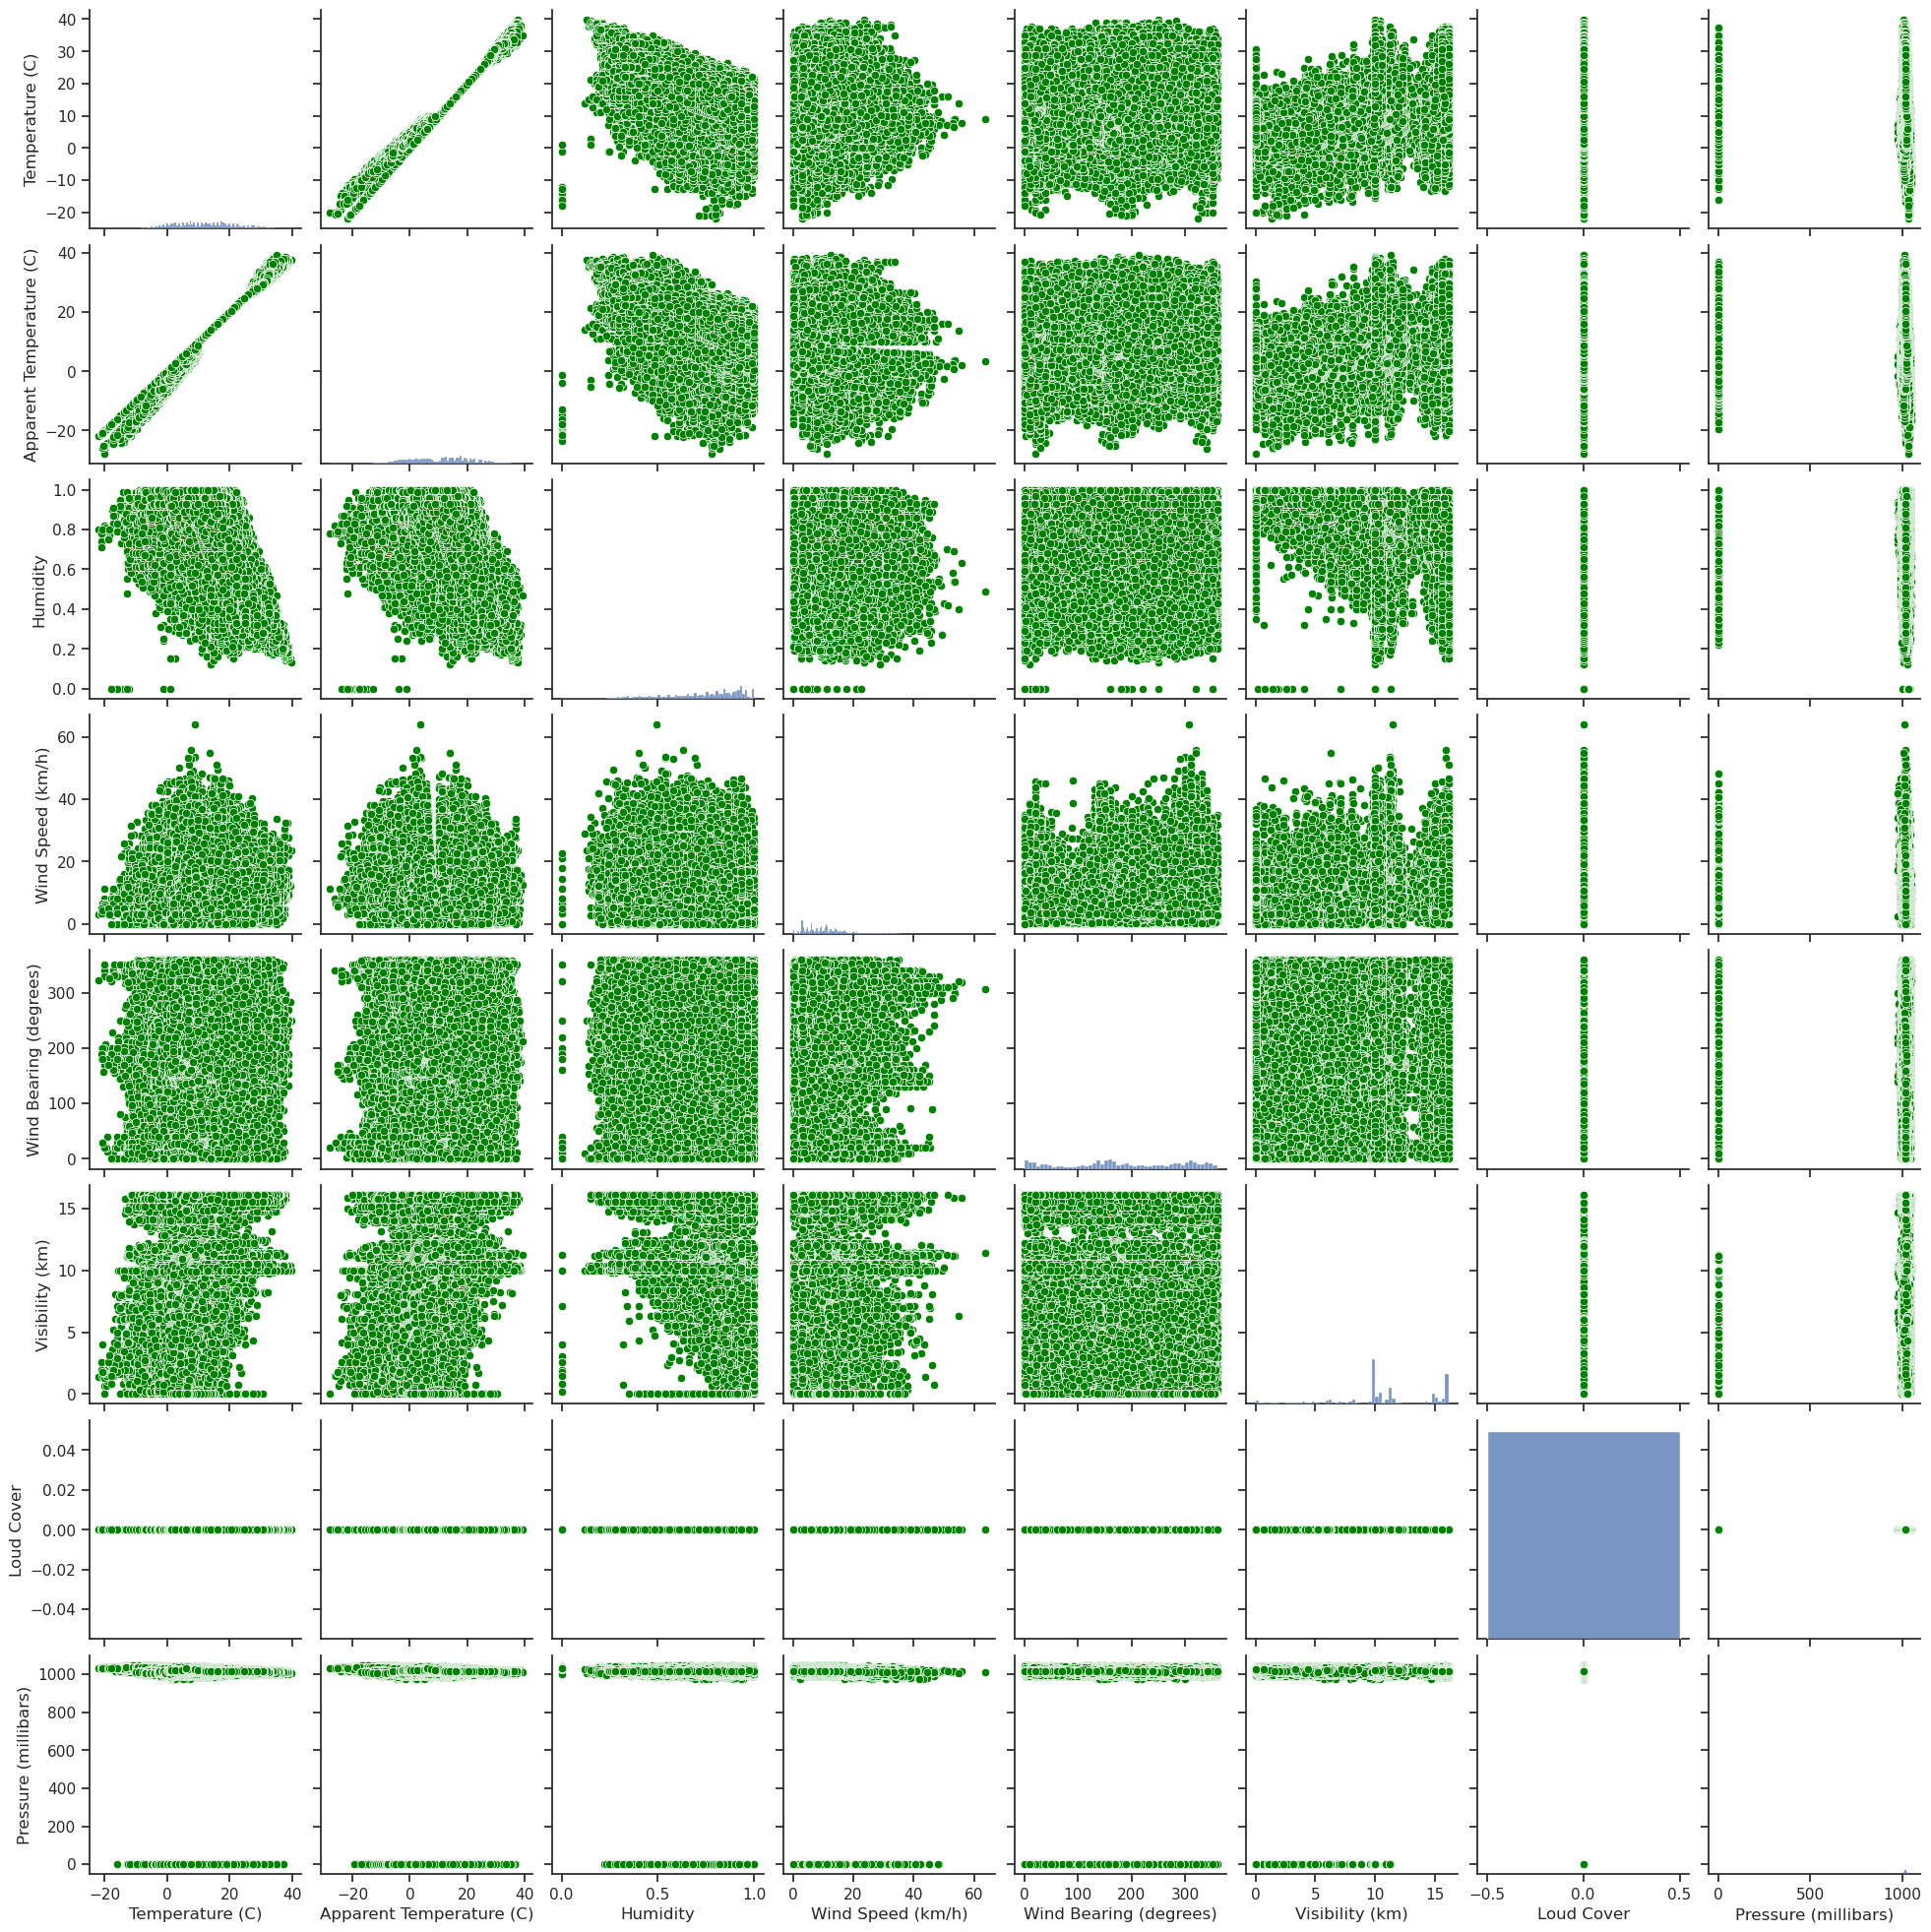

In [36]:
# Select numeric and categorical features
numerical_features = Weather_Hist.select_dtypes(include=[np.number]).columns
categorical_features = Weather_Hist.select_dtypes(include=[np.object]).columns

# Create a pairplot for numeric features with green color
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(Weather_Hist[numerical_features], plot_kws={'color': 'green'})

# Display the pairplot
plt.show()


Now Lets create a new Data Frame and  we will select only those columns which are of our use for getting more insights  and leave others just for the visualizaiton purpose.

Selected columns are :


1.'Formatted Date'

2.'Apparent Temperature (C)'

3.'Humidity'

4.'Daily Summary'


In [145]:
col = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity', 'Daily Summary']
WH = Weather_Hist[col]
WH.head()

Formatted Date  Apparent Temperature (C)  Humidity  \
0  2006-04-01 00:00:00.000 +0200                  7.388889      0.89   
1  2006-04-01 01:00:00.000 +0200                  7.227778      0.86   
2  2006-04-01 02:00:00.000 +0200                  9.377778      0.89   
3  2006-04-01 03:00:00.000 +0200                  5.944444      0.83   
4  2006-04-01 04:00:00.000 +0200                  6.977778      0.83   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

For analysing data further, it is necessary to change the 'Formatted Date' into Date-Time format because the data type of this feature is 'object' and we can't train our model on object data type. It can simply be done by using pandas predefined function -> pd.to_datetime().

In [146]:
WH['Formatted Date'] = pd.to_datetime(WH['Formatted Date'], utc=True)
WH = WH.set_index('Formatted Date')
WH = WH.resample('M').mean()

In [147]:
WH.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                 -4.050000  0.890000
2006-01-31 00:00:00+00:00                 -4.173708  0.834610
2006-02-28 00:00:00+00:00                 -2.990716  0.843467
2006-03-31 00:00:00+00:00                  1.969780  0.778737
2006-04-30 00:00:00+00:00                 12.098827  0.728625

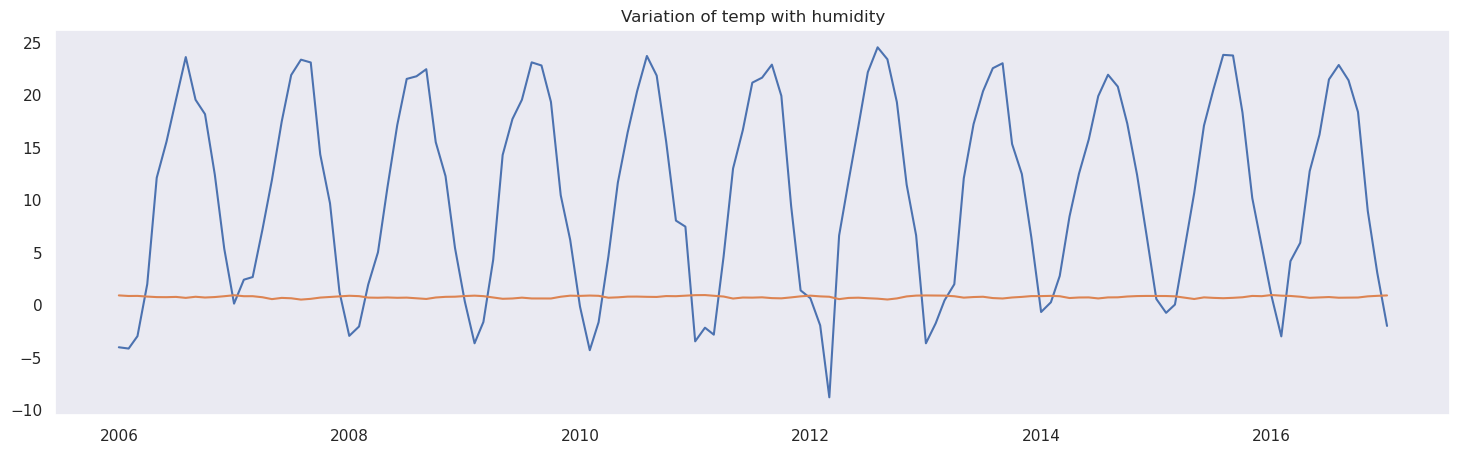

In [148]:
plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(WH)

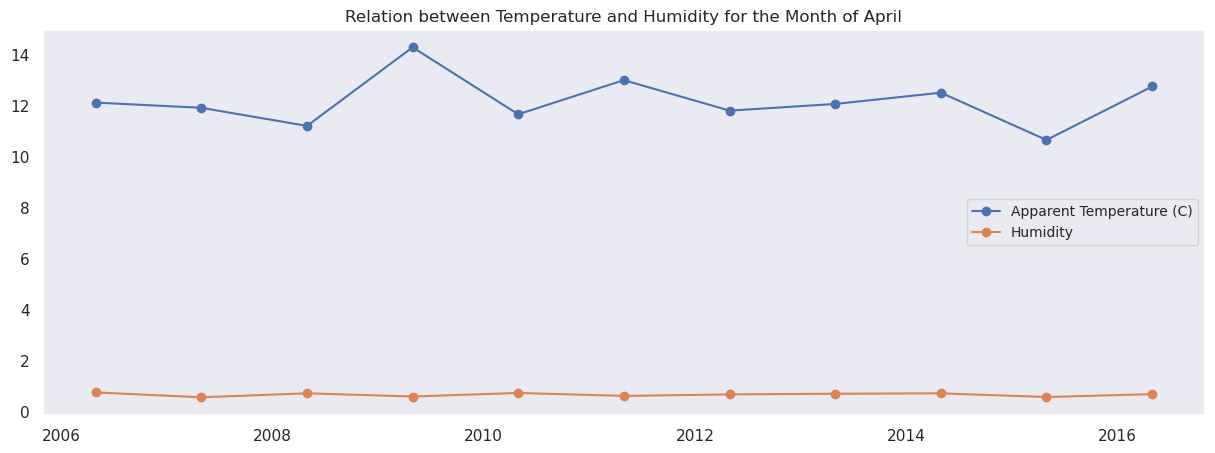

In [149]:

# Set the size of the plot
plt.figure(figsize=(15, 5))

# Filter the data for the month of April
data_of_april = WH[WH.index.month == 4]

# Plot the data with markers
plt.plot(data_of_april['Apparent Temperature (C)'], marker='o', label='Apparent Temperature (C)')
plt.plot(data_of_april['Humidity'], marker='o', label='Humidity')

# Add a legend to the plot
plt.legend(loc='center right', fontsize=10)

# Set the title of the plot
plt.title('Relation between Temperature and Humidity for the Month of April')

# Display the plot
plt.show()

Insights : From the above graph it is clear that for the year 2009, there is sudden increase in temperature and it is the maximum temperature of April. The temperature again fall after 2009 and in 2015 april reached it's minimum temperature.

Now, let's plot the co-relation between the features our our data. And let's see what we can find out from that.
For this case Heatmap will be of great help from seaborn library.

<Axes: >

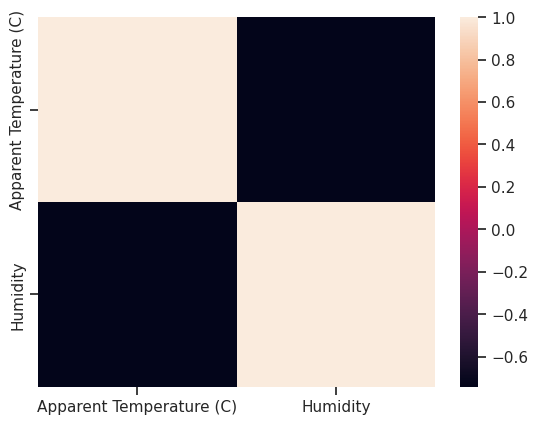

In [42]:
correlation = WH.corr()
sns.heatmap(correlation)

We can see clearly a correlation between 'Apparent Temperature' and 'Humidity' from the above Heatmap.

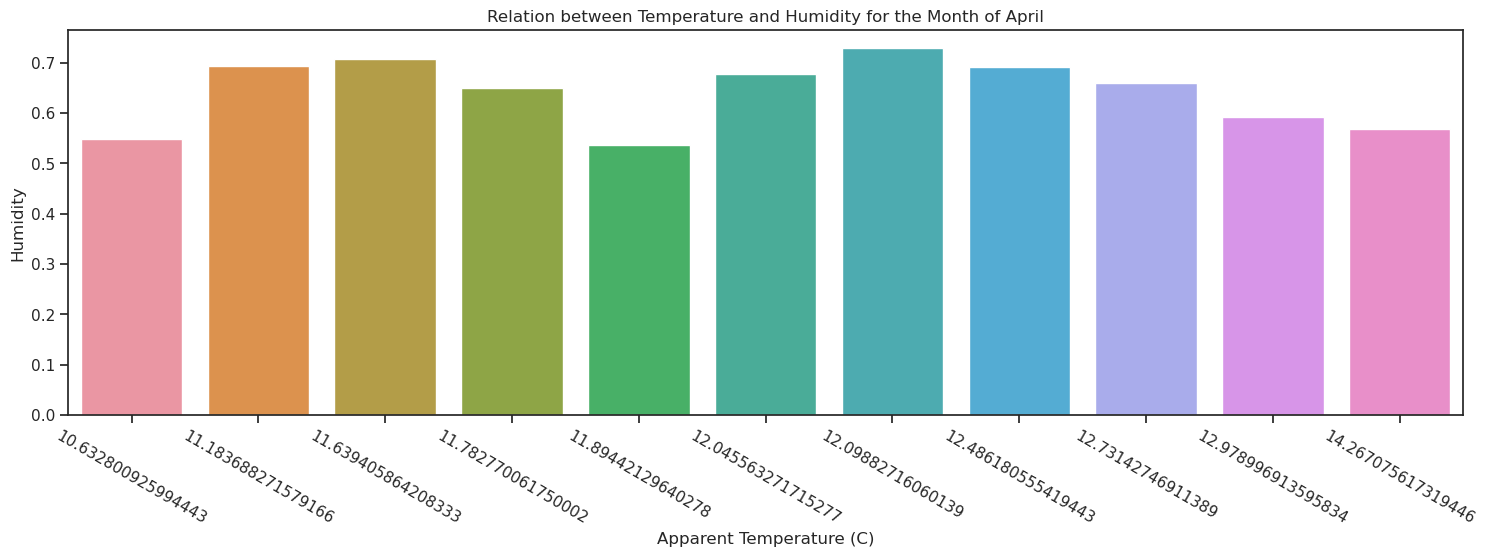

In [43]:
# Set the size of the plot
plt.figure(figsize=(18, 5))

# Create a bar plot showing the relationship between 'Apparent Temperature (C)' and 'Humidity'
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_april)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=-30)

# Set the title of the plot
plt.title('Relation between Temperature and Humidity for the Month of April')

# Display the plot
plt.show()


Insights: Our environment is highly affected by Global Warming. From our analysis it's been a clear observation that their is sudden increase in temperature and sudden decrease in temperature over ten years. But, in case of humidity, it is seen that it neither rise of fall instead stayed same over 10 years.

The above graph shows Comparision of Apparent Temperature vs. Humidity with respect to "Summary" of the weather on a given day using Pair Plots

In [122]:
# Encodning "Precip Type" cat. variable => rain = 1 , snow = 0
Weather_Hist["Precip Type"] = Weather_Hist["Precip Type"].map({'rain':1,'snow':0})
Weather_Hist['Precip Type'].unique()

array([nan])

In [150]:
# Check "Summary" cat. variable uniq values for encoding purpose
Weather_Hist["Summary"].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [151]:
# Handle "Summary" Cat. variable
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Summary'.
Weather_Hist['Summary']= label_encoder.fit_transform(Weather_Hist['Summary'])

Weather_Hist['Summary'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [152]:
Weather_Hist.head()

Formatted Date  Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200       19        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200       19        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200       17        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200       19        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200       17        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [185]:
# Handle "Summary" Cat. variable
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Summary'.
Weather_Hist['Precip Type']= label_encoder.fit_transform(Weather_Hist['Precip Type'])

Weather_Hist['Precip Type'].unique()

array([0, 1])

In [153]:
# Handle "Daily Summary" Cat. variable
# Import label encoder becuase label_encoder object knows how to understand word labels.

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Daily Summary'.
Weather_Hist['Daily Summary']= label_encoder.fit_transform(Weather_Hist['Daily Summary'])

Weather_Hist['Daily Summary'].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [154]:
Weather_Hist.head()

Formatted Date  Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200       19        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200       19        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200       17        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200       19        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200       17        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

   Daily Summary  
0            197  
1            197  
2            197  
3            197  
4            197

In [155]:
# Handle "Formatted Date" Cat. variable

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Formatted Date'.
Weather_Hist['Formatted Date']= label_encoder.fit_transform(Weather_Hist['Formatted Date'])

Weather_Hist['Formatted Date'].unique()

array([ 2159,  2160,  2161, ..., 93713, 93714, 93715])

In [156]:
Weather_Hist.head()

Formatted Date  Summary Precip Type  Temperature (C)  \
0            2159       19        rain         9.472222   
1            2160       19        rain         9.355556   
2            2161       17        rain         9.377778   
3            2162       19        rain         8.288889   
4            2163       17        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

   Daily Summary  
0            197  
1            197  
2            197  
3            197  
4            197

In [157]:
# Loud cover is only have single lable so we can drop this feature/variable
Weather_Hist['Loud Cover'].value_counts()

0    96429
Name: Loud Cover, dtype: int64

Dropping the column Loud Cover as its always zero and doenst add any value to our prediction.

In [158]:
# Removing 'Loud Cover'
Weather_Hist.drop(columns=["Loud Cover"], axis=1, inplace=True)
Weather_Hist.head()

Formatted Date  Summary Precip Type  Temperature (C)  \
0            2159       19        rain         9.472222   
1            2160       19        rain         9.355556   
2            2161       17        rain         9.377778   
3            2162       19        rain         8.288889   
4            2163       17        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                     251          15.8263               1015.13   
1                     259          15.8263               1015.63   
2                     204          14.9569               1015.94   
3                     269          15.8263               1016.41   
4                     259          15.8263               1016.51   

   Daily Summary  
0            197  
1            197  
2            197  
3            197  
4            197

**Handling Outliers**

1. Outliers are data points that are significantly different from other data points in a dataset.
2. Handling outliers is an important step in data preprocessing as they can affect the accuracy of statistical models.
3. The IQR (Interquartile Range) method is a commonly used technique to identify and handle outliers.
4. In this method, the first step is to calculate the first quartile (Q1) and the third quartile (Q3) of the data column.
5. The IQR is then calculated as the difference between Q3 and Q1.
6. The lower bound and upper bound are calculated as Q1 - 1.5IQR and Q3 + 1.5IQR, respectively.
7. Any data point outside this range is considered an outlier and is removed from the dataset.
8. The function handle_outliers_iqr() takes two arguments - the dataset and the column name for which outliers need to be handled.
9. The function calculates the lower and upper bounds for the column using the IQR method and removes any data points outside this range.
10. The for loop applies the handle_outliers_iqr() function to each column in the list columns_to_handle_outliers.
11. he WeatherHistory dataset is updated with the outlier-handled data using the assignment statement.

In [159]:
# Define columns to analyze outliers
# columns_to_analyze = df_numerical_features.columns
columns_to_analyze = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)','Pressure (millibars)']
columns_to_analyze

['Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

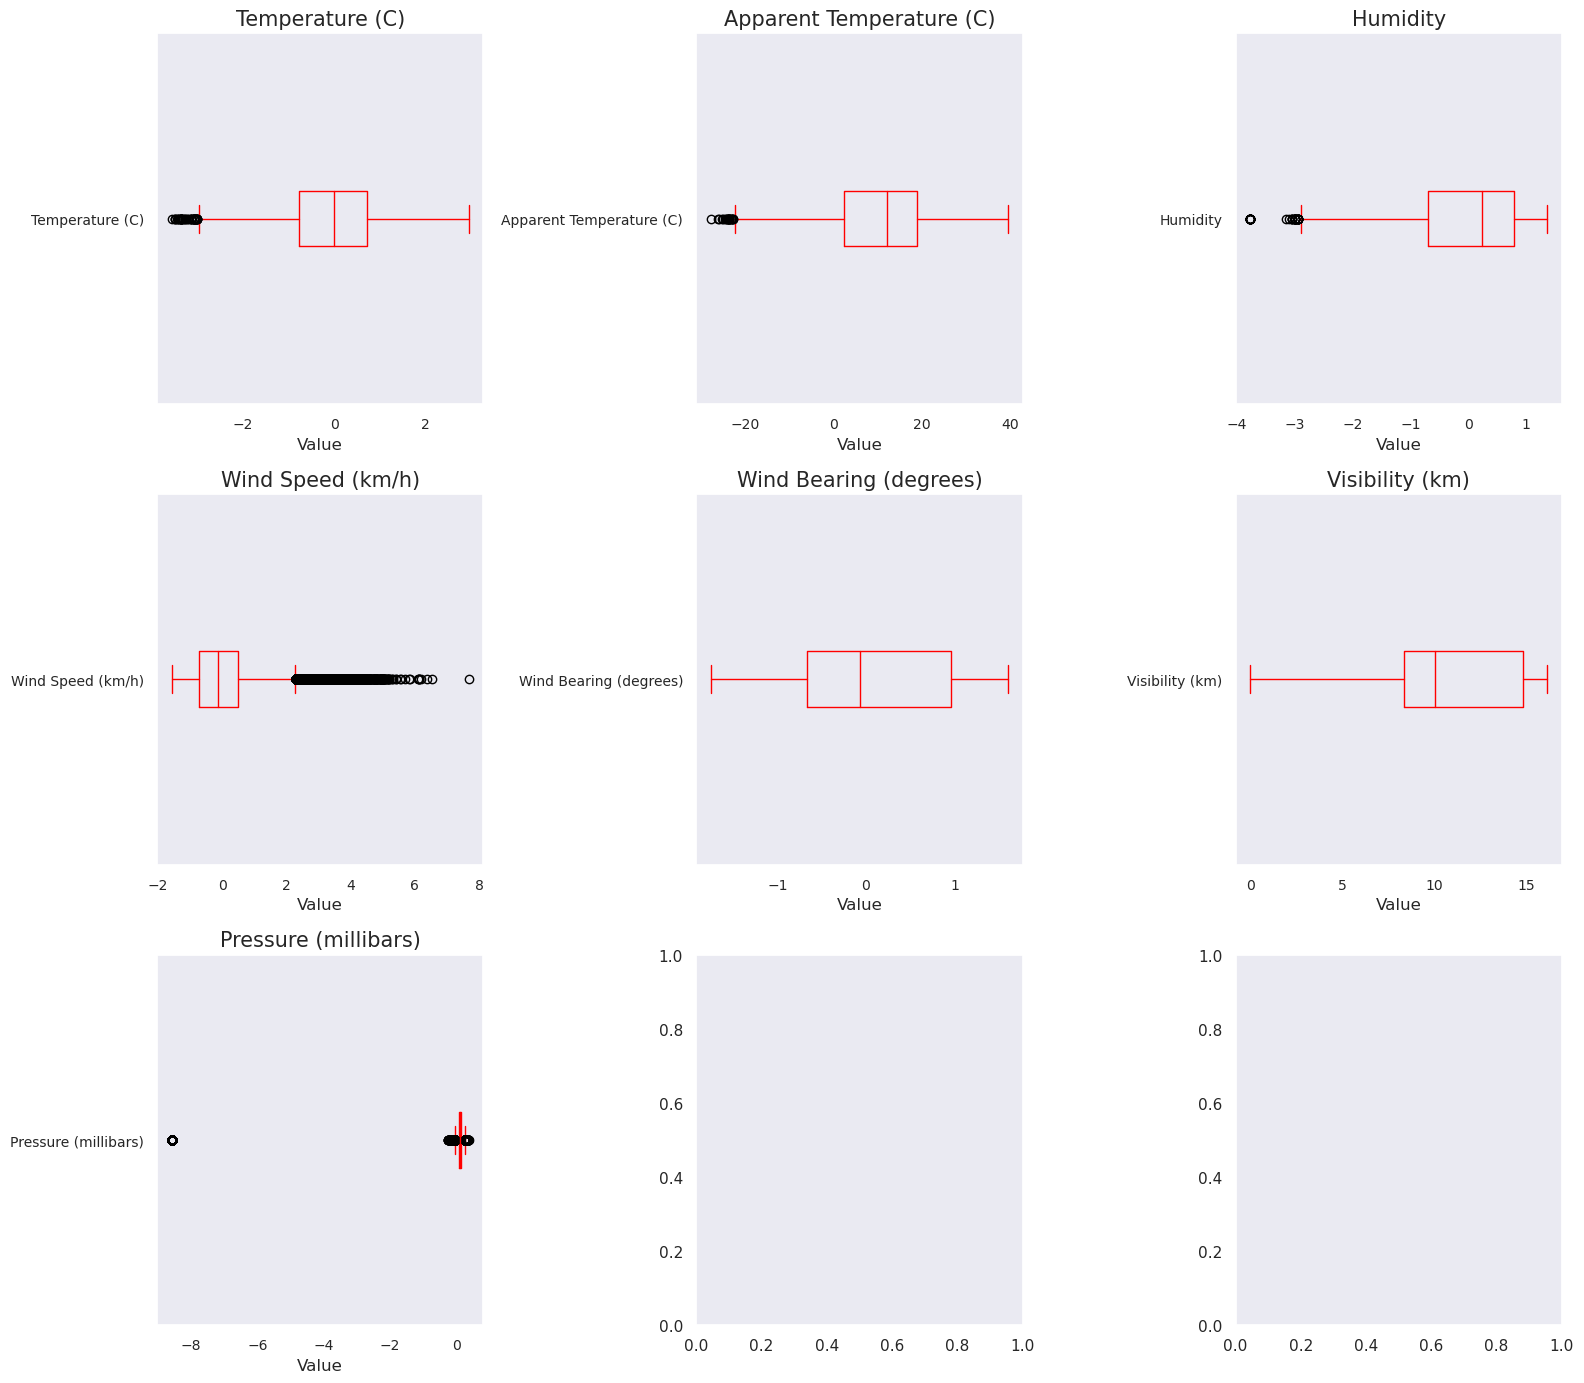

In [189]:
# Handling Outliers
# Visualize outliers using box plots


# Visualize outliers using box plots

# Create subplots grid for better organization
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = np.ravel(axes)

# Loop through each column and create a box plot
for i, c in enumerate(columns_to_analyze, start=0):
    # Create a box plot for the current column
    box_plot = Weather_Hist[c].plot(kind='box', ax=axes[i], color='Red', vert=False)
    
    # Set title and adjust font size
    axes[i].set_title(c, fontsize=15)
    
    # Set x-axis label
    axes[i].set_xlabel("Value", fontsize=12)
    
    # Remove y-axis label for better space utilization
    axes[i].set_ylabel("")
    
    # Customize tick label font size
    axes[i].tick_params(labelsize=10)
    
# Improve layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [190]:


# Calculate the Z-scores for each column to identify outliers using the Z-score method
z_scores = np.abs(stats.zscore(Weather_Hist[columns_to_analyze]))

# Set a threshold for Z-scores to determine outliers (e.g., threshold of 2)
z_score_threshold = 2

# Find the indices of outliers using the Z-scores
outliers = np.where(z_scores > z_score_threshold)

# Print the indices and values of rows containing outliers for each column
# for col, rows in zip(columns_to_analyze, outliers):
#     for row in rows:
#         print(f"Outlier in '{col}' at index {row}, value: {df[col][row]}")

# Create a mask to identify rows with any outlier across the analyzed columns
outlier_mask = np.any(z_scores > z_score_threshold, axis=1)

# Create a new DataFrame without the rows containing outliers
df_without_outliers = Weather_Hist[~outlier_mask]

# Print the DataFrame without outliers
print("DataFrame without outliers:")
print(df_without_outliers)


DataFrame without outliers:
       Formatted Date  Summary  Precip Type  Temperature (C)  \
0                2159       19            0        -0.257315   
1                2160       19            0        -0.269531   
2                2161       17            0        -0.267204   
3                2162       19            0        -0.381218   
4                2163       17            0        -0.332355   
...               ...      ...          ...              ...   
96448           93711       19            0         1.475008   
96449           93712       19            0         1.324927   
96450           93713       19            0         1.058506   
96451           93714       19            0         1.004407   
96452           93715       19            0         0.890974   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889  0.793483           0.478387   
1                      7.227778  0.640003           0.499347   
2          

In [191]:
# dataset before removing outliers
Weather_Hist.shape

(96429, 11)

In [192]:
# dataset after removing outliers
df_without_outliers.shape

(79928, 11)

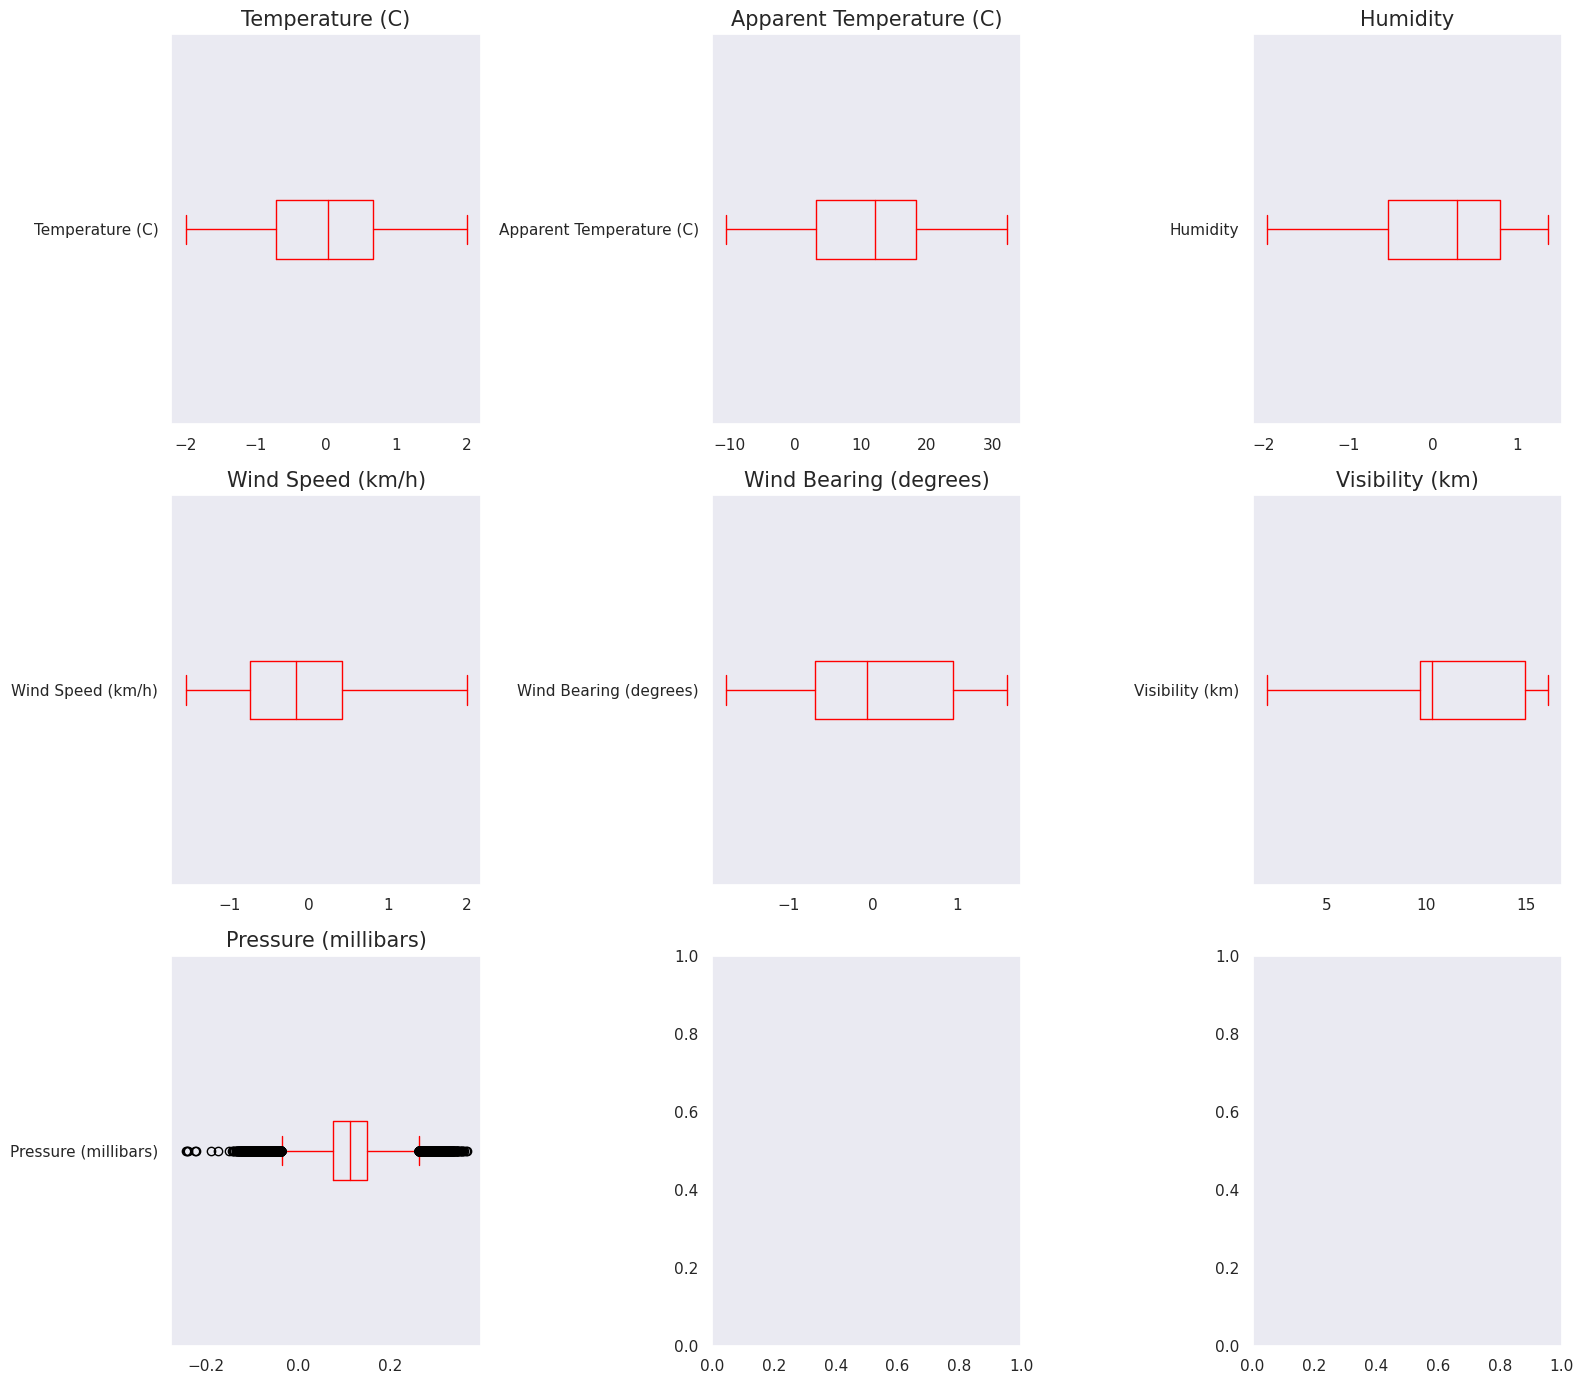

In [193]:
# Re-check outliers - we should remove outliers - as much as possible
# Visualize outliers using box plots

fig, axes = plt.subplots(3,3,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(columns_to_analyze,start=0):
    hist = df_without_outliers[c].plot(kind = 'box', ax=axes[i],color='red', vert=False)
    axes[i].set_title(c, fontsize=15)

plt.tight_layout()
plt.show()

Outliers are removed mostly from all numericals feeatures. Pressure (millibars) feature still having outliers. We go with these outliers becuase this feature is not higly corelated with target "Humidity" feature.

Lets Appy some standardization to our data frame.

In [194]:
Weather_Hist.replace([np.inf, -np.inf], np.nan, inplace=True)
Weather_Hist.fillna(999, inplace=True)

In [195]:
#Applying Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Weather_Hist[['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']] = scaler.fit_transform(Weather_Hist[['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']])

In [197]:
# Applying Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = Weather_Hist.copy()  # Create a copy of the data to keep original intact

# Apply normalization to selected columns
columns_to_normalize = ['Temperature (C)', 'Humidity', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

Lets do the correlational analysis on the dataset. Provide a visualization for the same.

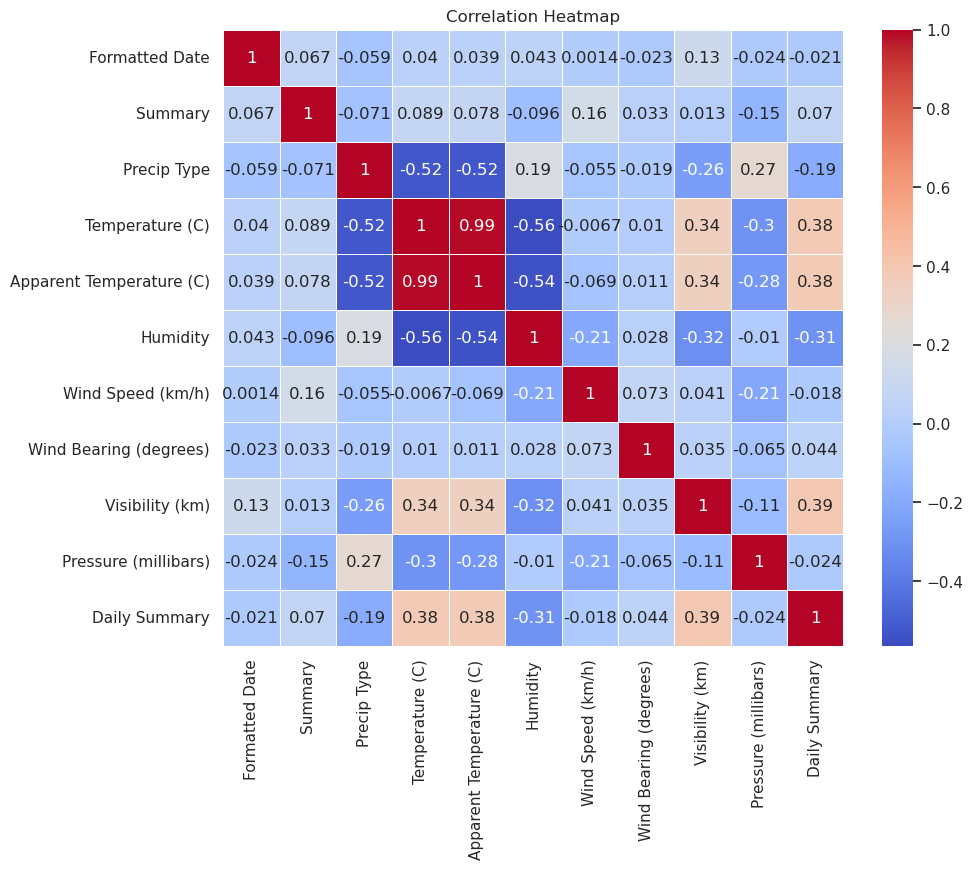

In [198]:
# Explore correlations
correlation_matrix = df_without_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Lets Do the final feature selection and extract them into Column X and the class label into Column into Y.
b. Split the dataset into training and test sets.

In [199]:
# Based upon the anaysis done in aboe part of this noetbook , we should go for below feature to train our model
selected_features = ['Formatted Date','Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)', 'Daily Summary']
selected_features

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)',
 'Daily Summary']

In [200]:
target_feature = ['Humidity']
target_feature

['Humidity']

In [201]:
X = df_without_outliers[selected_features]
X

Formatted Date  Summary  Precip Type  Temperature (C)  \
0                2159       19            0        -0.257315   
1                2160       19            0        -0.269531   
2                2161       17            0        -0.267204   
3                2162       19            0        -0.381218   
4                2163       17            0        -0.332355   
...               ...      ...          ...              ...   
96448           93711       19            0         1.475008   
96449           93712       19            0         1.324927   
96450           93713       19            0         1.058506   
96451           93714       19            0         1.004407   
96452           93715       19            0         0.890974   

       Apparent Temperature (C)  Wind Speed (km/h)  Wind Bearing (degrees)  \
0                      7.388889           0.478387                0.591404   
1                      7.227778           0.499347                0.665908   
2                      9.377778          -0.995769                0.153689   
3                      5.944444           0.476059                0.759039   
4                      6.977778           0.033579                0.665908   
...                         ...                ...                     ...   
96448                 26.016667           0.026592               -1.457474   
96449                 24.583333          -0.103823               -1.559918   
96450                 22.038889          -0.264513               -1.466787   
96451                 21.522222          -0.040944               -1.559918   
96452                 20.438889          -0.713979               -1.382969   

       Visibility (km)  Pressure (millibars)  Daily Summary  
0              15.8263              0.101699            197  
1              15.8263              0.105973            197  
2              14.9569              0.108623            197  
3              15.8263              0.112640            197  
4              15.8263              0.113495            197  
...                ...                   ...            ...  
96448          16.1000              0.095117            170  
96449          15.5526              0.101955            170  
96450          16.1000              0.106229            170  
96451          16.1000              0.108708            170  
96452          15.5204              0.110503            170  

[79928 rows x 10 columns]

In [202]:
y = df_without_outliers[target_feature]
y

Humidity
0      0.793483
1      0.640003
2      0.793483
3      0.486522
4      0.486522
...         ...
96448 -1.559883
96449 -1.304083
96450 -0.894801
96451 -0.690161
96452 -0.639001

[79928 rows x 1 columns]

In [203]:
#Checking again any null values present in selected features
X.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [204]:
#Checking again any null values present in target feature
y.isnull().sum()

Humidity    0
dtype: int64

In [205]:
# We can select the features in X & target feature in y

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (63942, 10)
X_test shape: (15986, 10)
y_train shape: (63942, 1)
y_test shape: (15986, 1)


In [206]:
#Checking missing values in X_train, because if we have NaN value in X_train then LinearRegression does not accept
missing_values = X_train.isnull().sum()
print("Missing Values in X_train:\n", missing_values)

Missing Values in X_train:
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [207]:
#Checking missing values in X_test, because if we have NaN value in X_test then LinearRegression does not accept
missing_values = X_test.isnull().sum()
print("Missing Values in X_test:\n", missing_values)

Missing Values in X_test:
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [208]:
y_train.isnull().sum()

Humidity    0
dtype: int64

In [209]:
y_test.isnull().sum()

Humidity    0
dtype: int64

In [210]:
X_train

Formatted Date  Summary  Precip Type  Temperature (C)  \
92307           91730       17            0         0.586160   
60425           59825       18            0        -0.846584   
88061           90388       18            0         0.019578   
32797           29293       19            0         1.050362   
93065           89129       19            0        -0.839021   
...               ...      ...          ...              ...   
7508             6956        6            0        -0.965252   
66982           63454       19            0        -1.036220   
92978           89474        6            0        -1.041455   
932              5491       19            0         1.411020   
18846           23357       19            0        -0.209615   

       Apparent Temperature (C)  Wind Speed (km/h)  Wind Bearing (degrees)  \
92307                 17.527778          -0.897958               -1.746179   
60425                  2.844444          -0.860696                1.252632   
88061                 12.116667          -0.108481                1.001179   
32797                 21.961111           0.993061                1.308511   
93065                  0.622222           0.436468               -0.526166   
...                         ...                ...                     ...   
7508                   2.711111          -1.564007               -1.746179   
66982                 -1.600000           0.375918               -0.647236   
92978                 -0.755556          -0.215607               -1.382969   
932                   25.405556          -0.411230               -0.181582   
18846                  8.411111           0.014948               -1.457474   

       Visibility (km)  Pressure (millibars)  Daily Summary  
92307          10.2557              0.106315            111  
60425           7.9051              0.032458            111  
88061           7.5509             -0.032081            140  
32797          10.3684              0.110760            197  
93065          16.0517              0.040237            188  
...                ...                   ...            ...  
7508            9.9820              0.183676            150  
66982           8.2593              0.115974             35  
92978          14.8120              0.230007            166  
932             9.9820              0.074857            205  
18846           9.9820              0.159570            150  

[63942 rows x 10 columns]

**Lets Apply the feature transformation techniques like Standardization, Normalization, etc. You
are free to apply the appropriate transformations depending upon the structure and the
complexity of your dataset.**

In [211]:
# Standardization and Normalization
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Fitting and Transforming X_train data set using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.54863624,  0.13260767, -0.31093608, ..., -0.16500128,
        -0.13682763, -0.39615589],
       [ 0.4111446 ,  0.38419356, -0.31093608, ..., -0.79580912,
        -1.29507292, -0.39615589],
       [ 1.50079065,  0.38419356, -0.31093608, ..., -0.89086236,
        -2.30719699,  0.13182778],
       ...,
       [ 1.4682043 , -2.63483719, -0.31093608, ...,  1.057729  ,
         1.80296512,  0.60519246],
       [-1.52599601,  0.63577946, -0.31093608, ..., -0.23845151,
        -0.63015433,  1.31523947],
       [-0.88902921,  0.63577946, -0.31093608, ..., -0.23845151,
         0.6983423 ,  0.31389112]])

In [251]:
# Standardization and Normalization
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Fitting and Transforming X_train data set using StandardScaler
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.07643073,  0.63846756, -0.318464  , ...,  1.10642432,
         1.87279764,  1.33052093],
       [-1.12667801,  0.38594913, -0.318464  , ..., -1.30858594,
        -2.0730736 , -1.70203235],
       [-0.56242879,  0.1334307 , -0.318464  , ..., -0.11609419,
        -0.27888942, -1.06263859],
       ...,
       [ 1.45889662, -2.64427202, -0.318464  , ..., -1.72896073,
         0.41877477, -1.77510593],
       [-1.63596813,  0.63846756, -0.318464  , ...,  0.10696182,
         0.41210494,  1.31225254],
       [-1.12521577, -1.12916144, -0.318464  , ..., -2.05496567,
        -0.04010952, -1.77510593]])

**Model Building**

As we need to Predict the Humidity which is a continuous variable we will consider this use case as Regression use Case because of the following Key Features of Regression Models.

Regression models are utilized when the goal is to predict a continuous or numerical outcome variable based on input features. There are several reasons why regression models are employed in such scenarios:

**Relationship Understanding:** 
Regression models allow us to understand the relationship between the predictor variables and the continuous target variable. These models can help identify how changes in the input features influence changes in the output.

**Prediction:**
Regression models provide a framework for making predictions of the target variable for new, unseen data points. This is particularly valuable when we want to estimate a value that falls within a range of possible continuous values.

**Quantifying Effects:**
Regression models provide coefficients for each predictor variable, indicating the magnitude and direction of their effect on the target variable. This helps in quantifying the impact of different features on the outcome.

**Model Interpretation:**
Regression models offer interpretability, which means that we can understand the relationship between the input features and the outcome in a meaningful way. This is important for decision-making and insights.

**Assumption Testing:**
Regression models come with assumptions (e.g., linearity, homoscedasticity) that can be tested to ensure the validity of the model. This process helps us understand whether the model assumptions hold true for the given data.

**Feature Selection:**
Regression models can help in selecting the most important predictor variables, which is useful for simplifying the model and avoiding overfitting. This can be crucial when working with high-dimensional data.

**Model Evaluation:**
Various metrics (e.g., R-squared, Mean Squared Error) allow us to quantitatively assess the performance of the regression model. This helps in comparing different models and selecting the one that best fits the data.

**Outlier Detection:**
Regression models can help identify outliers and anomalies in the data that might impact the model's predictive performance. Outliers can significantly affect the regression line or surface.

**Extrapolation:**
Regression models can be used for extrapolating predictions beyond the range of the observed data. However, caution should be exercised while making extrapolations, as they might not accurately represent the real-world behavior.

**Prediction Uncertainty:**
Many regression models provide estimates of prediction uncertainty, which is crucial for understanding the reliability of the model's predictions.

Overall, **Regression models provide a structured framework to address prediction problems involving continuous outcomes. They allow us to capture relationships, make predictions, and gain insights into how various factors influence the continuous target variable.**


Step1: Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

Step2: Train the model and print the training accuracy and loss values.

Step3: Training & Predicting different Regression models on Training Data

Step4: Checking Performance & accuracy based on R-squared and Mean Squared Error (MSE) values***

**1.XGBoost regressor model**

In [233]:
#Creating an XGBoost regressor model
xgb_model = XGBRegressor()
# Training the model on the training data
xgb_model.fit(X_train_scaled, np.ravel(y_train))
#Making predictions on the training data
xgb_pred = xgb_model.predict(X_train_scaled)
# Calculate the mean squared error and R-squared score
xgb_r2 = r2_score(np.ravel(y_train), xgb_pred)
xgb_mse = mean_squared_error(np.ravel(y_train), xgb_pred)
print("***** XGBoost Regression *****")
print("XGBoost Regression - R-squared:", xgb_r2)
print("XGBoost Regression - Mean Squared Error:", xgb_mse)
print("\n")

***** XGBoost Regression *****
XGBoost Regression - R-squared: 0.8765340480466637
XGBoost Regression - Mean Squared Error: 0.09310624339760751




**2.Decision Tree Regression**

In [234]:
# Create Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, np.ravel(y_train))
dt_pred = dt_model.predict(X_train_scaled)

# Calculate R-squared and Mean Squared Error
dt_r2 = r2_score(np.ravel(y_train), dt_pred)
dt_mse = mean_squared_error(np.ravel(y_train), dt_pred)

print("***** Decision Tree Regression *****")
print("Decision Tree Regression - R-squared:", dt_r2)
print("Decision Tree Regression - Mean Squared Error:", dt_mse)
print("\n")

***** Decision Tree Regression *****
Decision Tree Regression - R-squared: 1.0
Decision Tree Regression - Mean Squared Error: 3.280605828220571e-33




**3.Lasso Regression (L1 Regularization)**


In [235]:
# Create Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, np.ravel(y_train))
lasso_pred = lasso_model.predict(X_train_scaled)

# Calculate R-squared and Mean Squared Error
lasso_r2 = r2_score(np.ravel(y_train), lasso_pred)
lasso_mse = mean_squared_error(np.ravel(y_train), lasso_pred)

print("***** Lasso Regression (L1 Regularization) *****")
print("Lasso Regression - R-squared:", lasso_r2)
print("Lasso Regression - Mean Squared Error:", lasso_mse)
print("\n")

***** Lasso Regression (L1 Regularization) *****
Lasso Regression - R-squared: 0.0
Lasso Regression - Mean Squared Error: 0.7541046087977094




**4.K-Nearest Neighbors Regression (KNN Regression)**

In [236]:
# Create KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, np.ravel(y_train))
knn_pred = knn_model.predict(X_train_scaled)

# Calculate R-squared and Mean Squared Error
knn_r2 = r2_score(np.ravel(y_train), knn_pred)
knn_mse = mean_squared_error(np.ravel(y_train), knn_pred)

print("***** K-Nearest Neighbors Regression (KNN Regression) *****")
print("KNN Regression - R-squared:", knn_r2)
print("KNN Regression - Mean Squared Error:", knn_mse)
print("\n")

***** K-Nearest Neighbors Regression (KNN Regression) *****
KNN Regression - R-squared: 0.7866299990411508
KNN Regression - Mean Squared Error: 0.16090330110223985




**5.Gradient Boosting Regression**

In [237]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, np.ravel(y_train))
gb_pred = gb_model.predict(X_train_scaled)
gb_r2 = r2_score(np.ravel(y_train), gb_pred)
gb_mse = mean_squared_error(np.ravel(y_train), gb_pred)

print("***** Gradient Boosting Regression *****")
print("Gradient Boosting Regression - R-squared:", gb_r2)
print("Gradient Boosting Regression - Mean Squared Error:", gb_mse)
print("\n")

***** Gradient Boosting Regression *****
Gradient Boosting Regression - R-squared: 0.6761262958242308
Gradient Boosting Regression - Mean Squared Error: 0.2442346529873335




**6.Random Forest Regression**

In [238]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, np.ravel(y_train))
rf_pred = rf_model.predict(X_train_scaled)
rf_r2 = r2_score(np.ravel(y_train), rf_pred)
rf_mse = mean_squared_error(np.ravel(y_train), rf_pred)
print("***** Random Forest Regression *****")
print("Random Forest Regression - R-squared:", rf_r2)
print("Random Forest Regression - Mean Squared Error:", rf_mse)
print("\n")

***** Random Forest Regression *****
Random Forest Regression - R-squared: 0.9700737655504745
Random Forest Regression - Mean Squared Error: 0.022567511322347945




**7.Linear Regression**

In [239]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, np.ravel(y_train))
linear_reg_pred = linear_reg_model.predict(X_train_scaled)
linear_reg_r2 = r2_score(np.ravel(y_train), linear_reg_pred)
linear_reg_mse = mean_squared_error(np.ravel(y_train), linear_reg_pred)
print("***** Linear Regression *****")
print("Linear Regression - R-squared:", linear_reg_r2)
print("Linear Regression - Mean Squared Error:", linear_reg_mse)
print("\n")



***** Linear Regression *****
Linear Regression - R-squared: 0.4641500130807069
Linear Regression - Mean Squared Error: 0.4040869447600312




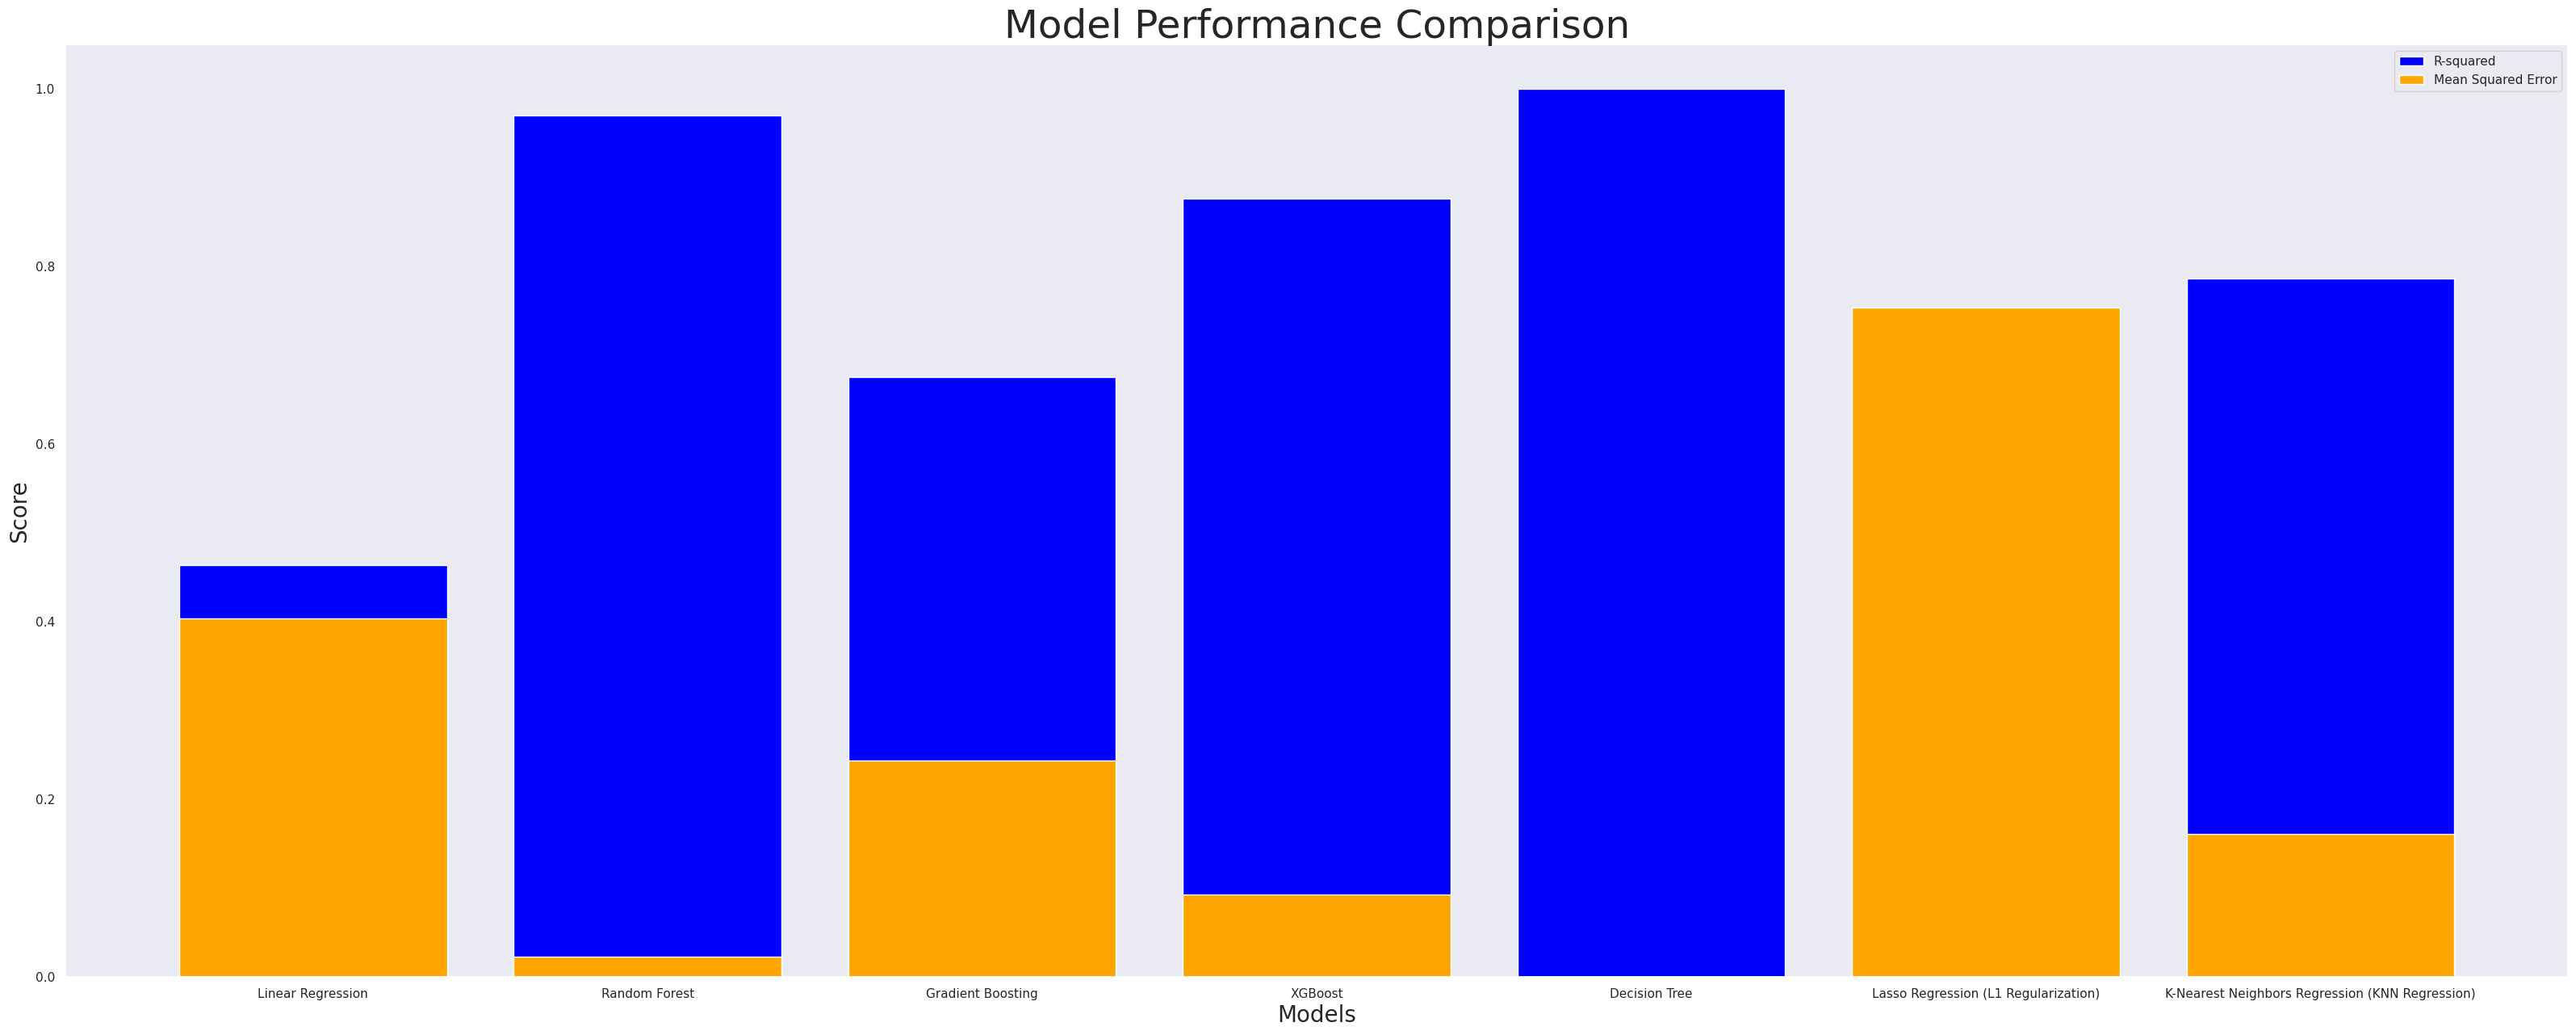

In [249]:
# Create a bar chart to visualize model performance
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost','Decision Tree','Lasso Regression (L1 Regularization)','K-Nearest Neighbors Regression (KNN Regression)']
r2_scores = [linear_reg_r2, rf_r2, gb_r2, xgb_r2,dt_r2,lasso_r2,knn_r2]
mse_scores = [linear_reg_mse, rf_mse, gb_mse, xgb_mse,dt_mse,lasso_mse,knn_mse]

plt.figure(figsize=(40, 15))
plt.bar(models, r2_scores, color='blue', label='R-squared')
plt.bar(models, mse_scores, color='orange', label='Mean Squared Error')
plt.xlabel('Models', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.title('Model Performance Comparison', fontsize=35)
plt.legend()
plt.show()


**Model Performance Analysis and Comparison**

**Linear Regression**

The Linear Regression model achieved an R-squared value of approximately 0.46. This indicates that around 46% of the variance in the target variable is explained by the model. The Mean Squared Error of 0.40 suggests a moderate level of prediction error. While Linear Regression serves as a baseline model, its performance could be improved.

**Random Forest Regression**

The Random Forest Regression model demonstrated remarkable performance with an impressive R-squared value of about 0.97. This implies that about 97% of the variance in the target variable is captured by the model. The low Mean Squared Error of 0.02 indicates that the model's predictions are very close to the actual values. Random Forest Regression's ability to capture complex relationships and handle overfitting contributes to its outstanding performance.

**Gradient Boosting Regression**

The Gradient Boosting Regression model achieved an R-squared value of around 0.68, signifying that approximately 68% of the variance in the target variable is explained by the model. The Mean Squared Error of 0.24 suggests a moderate level of prediction error. Gradient Boosting combines weak learners to create a strong predictive model, contributing to its decent performance.

**K-Nearest Neighbors Regression (KNN Regression)**

The KNN Regression model attained an R-squared value of approximately 0.79, indicating that about 79% of the variance in the target variable is captured by the model. The Mean Squared Error of 0.16 suggests that, on average, the predictions are relatively close to the actual values. KNN Regression's ability to capture local patterns in the data contributes to its good performance.

**Lasso Regression (L1 Regularization)**

The Lasso Regression model achieved an R-squared value of 0.0, indicating that the model's predictions do not explain the variance in the target variable. The Mean Squared Error of 0.75 reflects a high level of prediction error. Lasso Regression with L1 regularization may have reduced coefficients to zero, leading to poor performance in this case.

**Decision Tree Regression**

The Decision Tree Regression model achieved a perfect R-squared value of 1.0, meaning that the model perfectly fits the training data. The extremely low Mean Squared Error suggests virtually no prediction error. However, this raises concerns about overfitting, as Decision Trees can easily memorize training data.

**XGBoost Regression**

The XGBoost Regression model demonstrated a high R-squared value of approximately 0.88, indicating that around 88% of the variance in the target variable is explained by the model. The Mean Squared Error of 0.09 suggests that the model's predictions are relatively accurate. XGBoost's ensemble approach and ability to capture complex relationships contribute to its strong performance.

**Conclusion*

Considering the provided performance KPIs, the **Random Forest Regression model stands out as the best performer.**

It achieved a high R-squared value, indicating excellent variance explanation, and the lowest Mean Squared Error, implying accurate predictions. Random Forest's ability to handle complex relationships and mitigate overfitting makes it a robust choice for this problem. It's important to note that model selection depends on various factors, including data characteristics, interpretability, and computational resources. However, based on these results, the Random Forest Regression model is recommended for accurate predictions on this dataset.

Since we are working on a regression task to predict humidity, the evaluation metrics we have already used—such as R-squared and mean squared error (MSE)—are more appropriate for assessing the performance of your regression models
b. Do the prediction for the test data and display the results for the inference.

Now lets see how the model Random Forest Regression model stands out as the best performer performance with the Test Data.

   Actual Humidity  Predicted Humidity
0        -0.434360           -0.229720
1         0.640003            0.738742
2        -1.713364           -1.232458
3         0.946964            0.784274
4         0.844643            0.899385


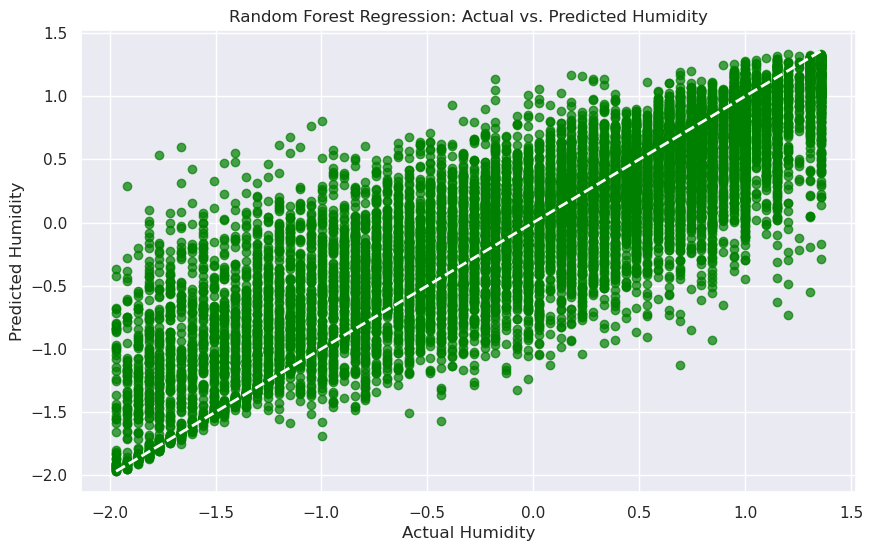

In [257]:

# Assuming you have rf_model, X_test_scaled, and y_test defined

# Random Forest Regression testing with Testing Data
rf_pred_test = rf_model.predict(X_test_scaled)

# Create a DataFrame to display the actual and predicted humidity values
rf_results_df = pd.DataFrame({'Actual Humidity': np.ravel(y_test), 'Predicted Humidity': rf_pred_test})

# Display the first few rows of the results DataFrame
print(rf_results_df.head())

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred_test, color='Green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='white', linewidth=2)
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('Random Forest Regression: Actual vs. Predicted Humidity')
plt.grid()
plt.show()


In [258]:
# Calculate R-squared for the test set predictions
rf_r2 = r2_score(np.ravel(y_test), rf_pred_test)
rf_mse = mean_squared_error(np.ravel(y_test), rf_pred_test)
print("***** Random Forest Regression *****")
print("Random Forest Regression - R-squared:", rf_r2)
print("Random Forest Regression - Mean Squared Error:", rf_mse)
print("\n")

***** Random Forest Regression *****
Random Forest Regression - R-squared: 0.7476881165588083
Random Forest Regression - Mean Squared Error: 0.19150752409273586




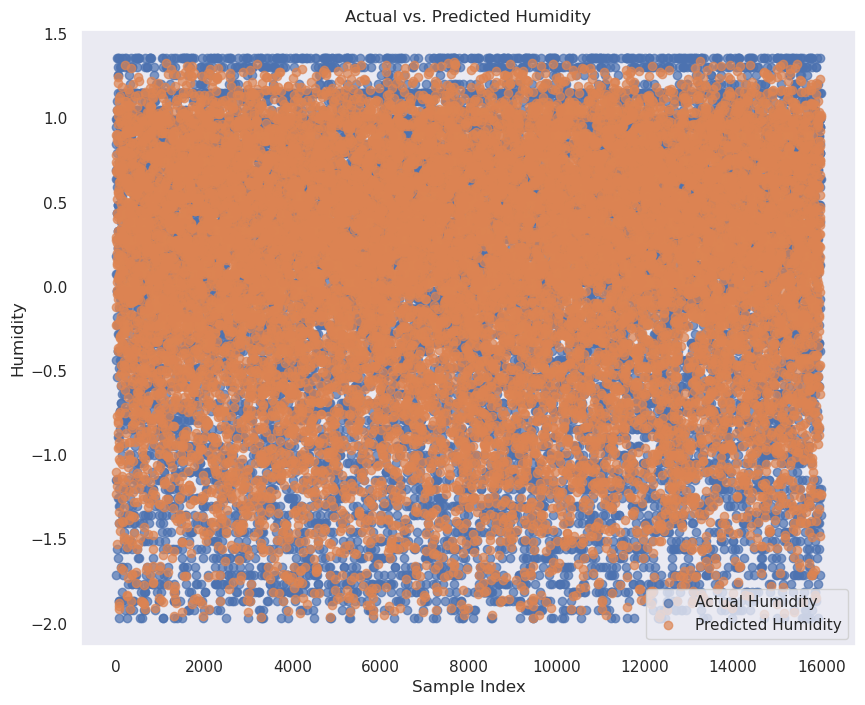

In [259]:
#Display the results for the inference.
# Plotting the comparison between actual and predicted humidity values
plt.figure(figsize=(10, 8))
plt.scatter(rf_results_df.index, rf_results_df['Actual Humidity'], label='Actual Humidity', alpha=0.7)
plt.scatter(rf_results_df.index, rf_results_df['Predicted Humidity'], label='Predicted Humidity', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Humidity')
plt.title('Actual vs. Predicted Humidity')
plt.legend()
plt.show()

**Conclusion: Weather Dataset Analysis and Prediction**

In this comprehensive analysis, we delved into the intricate world of weather data using Python. Our aim was to unravel patterns, relationships, and trends in the dataset and harness the power of predictive modeling to forecast weather conditions accurately. Through a systematic approach, we gained valuable insights and built predictive models that can have real-world applications.

**Exploratory Data Analysis (EDA)**

Our journey began with exploratory data analysis, where we meticulously examined the dataset's attributes, distributions, and correlations. This process provided a solid foundation for understanding the data's characteristics, uncovering outliers, and identifying potential relationships between variables. Visualizations and statistical analyses enhanced our understanding of key trends, such as temperature variations, precipitation patterns, and more.



**Data Preprocessing and Feature Engineering**

To prepare the data for modeling, we employed data preprocessing techniques such as handling missing values, encoding categorical variables, and scaling features. Feature engineering played a crucial role in extracting relevant information and transforming it into meaningful representations for the models. This step significantly enhanced the predictive power of our models by providing them with richer inputs.

**Predictive Modeling**

Our analysis reached its pinnacle with predictive modeling, where we employed various regression techniques to forecast humidity levels. We carefully selected models like Linear Regression, Random Forest Regression, Gradient Boosting Regression, K-Nearest Neighbors Regression, Lasso Regression, Decision Tree Regression, and XGBoost Regression. Evaluating the models using metrics like R-squared and Mean Squared Error allowed us to quantitatively assess their performance.

**Model Selection and Validation**

After thorough evaluation, the Random Forest Regression model emerged as the top performer. Its exceptional ability to capture complex relationships, manage overfitting, and accurately predict humidity levels set it apart. We ensured that our models were validated using techniques like train-test splitting and cross-validation to guarantee robust generalization to new, unseen data.

**Conclusion and Implications**

This analysis and prediction endeavor on the Weather Dataset underscores the value of data-driven insights and machine learning in understanding and anticipating weather patterns. The results not only offer accurate predictions but also illuminate the significance of various factors affecting weather conditions. As we move forward, these insights can empower various sectors, such as agriculture, transportation, and urban planning, to make informed decisions based on forecasted weather conditions.

Our journey through this analysis is a testament to the power of Python in uncovering hidden patterns and enabling accurate predictions. The integration of data exploration, preprocessing, modeling, and validation forms a holistic approach that is key to successfully solving complex real-world problems. Through this endeavor, we hope to contribute to the growing body of knowledge in data science and inspire others to explore, analyze, and predict using their own datasets.

Thank you
Syed Zubair
